# Model

\begin{align}
  \tau & \sim \mathrm{Exponential}(1 / 0.03) \\
  y_m & \sim \mathrm{Exponential}(\tau) \quad & \text{for} \quad m = 1, \dots, M \\
  \phi  & \sim \mathcal{N}^{ + }(0, 5) \\
  \kappa & \sim \mathcal{N}^{ + }(0, 0.5) \\
  \mu_m & \sim \mathcal{N}^{ + }(3.28, \kappa) \quad & \text{for} \quad m = 1, \dots, M \\
  \tilde{\alpha}_k &\sim \mathrm{Gamma}(0.1667, 1) \quad & \text{for} \quad k = 1, \dots, K \\
  \alpha_k &= \tilde{\alpha}_k - \frac{\log(1.05)}{6} \quad & \text{for} \quad  k = 1, \dots, K \\
  \varepsilon_m^{\text{ifr}} &\sim \mathcal{N}(1, 0.1)^{ + } \quad & \text{for} \quad m = 1, \dots, M \\
  \mathrm{ifr}_m^{ * } &\sim \mathrm{ifr}_m \cdot \varepsilon_m^{\text{ifr}} \quad & \text{for} \quad m = 1, \dots, M \\
  R_{t, m} &= \mu_m \exp(- \sum_{k=1}^{K} \alpha_k x_k) \quad & \text{for} \quad m = 1, \dots, M, \ t = 1, \dots, T  \\
  c_{t, m} &= R_{t, m} \bigg(1 - \frac{c_{t - 1, m}}{p_m} \bigg) \sum_{\tau = 1}^{t - 1} c_{\tau, m} s_{t - \tau} \quad & \text{for} \quad m = 1, \dots, M, \ t = 1, \dots, T \\
  d_{t, m} &= \mathrm{ifr}_m^{ * } \sum_{\tau=1}^{t - 1} c_{\tau, m} \pi_{t - \tau} \quad & \text{for} \quad m = 1, \dots, M, \ t = 1, \dots, T \\
  D_{t, m} &\sim \mathrm{NegativeBinomial}(d_{t, m}, \phi) \quad & \text{for} \quad m = 1, \dots, M, \ t = 1, \dots, T 
\end{align}

where
- $\mu_m$ represents the $R_0$ value for country $m$ (i.e. $R_t$ without any interventions)
- $\mathrm{ifr}_m$ denotes the /infection-fatality ratio/ for country $m$
- $\varepsilon_m^{\text{ifr}}$ denotes the noise for the multiplicative noise for the $\mathrm{ifr}_m^{ * }$
- $R_{t, m}$ denotes the /R-value/ at time $t$ for country $m$
- $p_{m}$ denotes the total/initial population for country $m$
- $\pi$ denotes the /time from infection to death/ and is assumed to be a sum of two independent random times: the /incubation period/ (infection-to-onset) and time between onset of symptoms and death (onset-to-death):
  \begin{equation*}
  \pi \sim \mathrm{Gamma}(5.1, 0.86) + \mathrm{Gamma}(18.8, 0.45)
  \end{equation*}
  where in this case the $\mathrm{Gamma}$ is parameterized by its mean and coefficient of variation.
- $\pi_t$ then denotes a discretized version of the PDF of $\pi$
- $c_{t, m}$ denotes the /expected daily cases/ at time $t$ for country $m$
- $d_{t, m}$ denotes the /expected daily deaths/ at time $t$ for country $m$
- $D_{t, m}$ denotes the /daily deaths/ at time $t$ for country $m$


# Code

In [1]:
using DrWatson

In [2]:
quickactivate(@__DIR__)

Activating environment at `~/Projects/mine/Covid19/Project.toml`


In [3]:
projectdir()

"/var/home/tef30/Projects/mine/Covid19"

In [4]:
# ENV["PYTHON"] = "$(ENV['HOME'])/.local/bin/python"

# using Pkg
# Pkg.build("PyCall")

In [5]:
using Bijectors

In [6]:
using Covid19

┌ Info: Precompiling Covid19 [1d6b4b23-2965-494f-a811-b0912eb134ac]
└ @ Base loading.jl:1273
┌ Warning: you are using the internal variable `_varinfo`
└ @ DynamicPPL ~/.julia/packages/DynamicPPL/3jy49/src/compiler.jl:175


In [7]:
using Turing
using Base.Threads
nthreads()

4

In [37]:
using Plots, StatsPlots
pyplot()

Plots.PyPlotBackend()

In [8]:
using Random
Random.seed!(1);

In [9]:
begin
    dist = product_distribution(fill(truncated(Normal(3.28, 10), 0, Inf), 14))
    b = bijector(dist)
    x = rand(dist)

    # stupid check to make sure that we have the correct versions of Bijectors.jl used WITHIN Turing.jl
    @assert (invlink(dist, b(x)) ≈ Turing.invlink(dist, b(x))) && (Turing.invlink(dist, b(x)) ≈ x)
end

In [10]:
begin
    @assert length(unique(rand(Turing.filldist(Gamma(.1667, 1), 6)))) > 1
end

In [11]:
using Pkg
Pkg.status()

Project Covid19 v0.1.0
    Status `~/Projects/mine/Covid19/Project.toml`
  [dce04be8] ArgCheck v2.0.0
  [131c737c] ArviZ v0.4.1
  [76274a88] Bijectors v0.6.7 #tor/using-bijectors-in-link-and-invlink (https://github.com/TuringLang/Bijectors.jl.git)
  [336ed68f] CSV v0.6.1
  [a93c6f00] DataFrames v0.20.2
  [31c24e10] Distributions v0.23.2
  [ced4e74d] DistributionsAD v0.4.10
  [634d3b9d] DrWatson v1.10.2
  [1a297f60] FillArrays v0.8.7
  [91a5bcdd] Plots v1.1.2
  [438e738f] PyCall v1.91.4
  [d330b81b] PyPlot v2.9.0
  [df47a6cb] RData v0.7.1
  [2913bbd2] StatsBase v0.33.0
  [f3b207a7] StatsPlots v0.14.5
  [fce5fe82] Turing v0.11.0 #tor/modelling-temporary (https://github.com/TuringLang/Turing.jl.git)
  [9a3f8284] Random 
  [10745b16] Statistics 


# Load data

In [12]:
using RData

In [13]:
import DrWatson: datadir

datadir() = projectdir("data", "imperial-report13")
datadir(s...) = projectdir("data", "imperial-report13", s...)

datadir (generic function with 2 methods)

In [14]:
rdata = load(datadir("processed.rds"));

┌ Warning: Conversion of RData.RDummy{0xfe} to Julia is not implemented
└ @ RData /var/home/tef30/.julia/packages/RData/7cjT6/src/convert.jl:142
┌ Warning: Unsupported AltRep SEXP
└ @ RData /var/home/tef30/.julia/packages/RData/7cjT6/src/convert.jl:205


In [15]:
# Convert some misparsed fields
# rdata["covariate4"] = Matrix(rdata["covariate4"]);

rdata["N2"] = Int(rdata["N2"]);
rdata["N0"] = Int(rdata["N0"]);

rdata["EpidemicStart"] = Int.(rdata["EpidemicStart"]);

rdata["cases"] = Int.(rdata["cases"]);
rdata["deaths"] = Int.(rdata["deaths"]);

# Stan will fail if these are `nothing` so we make them empty arrays
rdata["x"] = []
rdata["features"] = []

0-element Array{Any,1}

## Make data a bit more convenient to work with

In [16]:
countries = (
  "Denmark",
  "Italy",
  "Germany",
  "Spain",
  "United_Kingdom",
  "France",
  "Norway",
  "Belgium",
  "Austria", 
  "Sweden",
  "Switzerland",
  "Greece",
  "Portugal",
  "Netherlands"
)
num_countries = length(countries)

# TODO: not sure if either of the below is the correct ordering of the names!
# names_covariates = (
#     "Schools + Universities",
#     "Self-isolating if ill",
#     "Public events",
#     "Lockdown",
#     "Social distancing encouraged"
# )
names_covariates = ("schools_universities", "self_isolating_if_ill", "public_events", "any", "lockdown", "social_distancing_encouraged")
lockdown_index = findfirst(==("lockdown"), names_covariates)


function rename!(d, names::Pair...)
    # check that keys are not yet present before updating `d`
    for k_new in values.(names)
        @assert k_new ∉ keys(d) "$(k_new) already in dictionary"
    end
    
    for (k_old, k_new) in names
        d[k_new] = pop!(d, k_old)
    end
    return d
end


rename! (generic function with 1 method)

In [17]:
# `rdata` is a `DictOfVector` so we convert to a simple `Dict` for simplicity
d = Dict([(k, rdata[k]) for k in keys(rdata)]) # `values(df)` and `keys(df)` have different ordering so DON'T do `Dict(keys(df), values(df))`

# Rename some columns
rename!(
    d,
    "f" => "π", "SI" => "serial_intervals", "pop" => "population",
    "M" => "num_countries", "N0" => "num_impute", "N" => "num_obs_countries",
    "N2" => "num_total_days", "EpidemicStart" => "epidemic_start",
    "X" => "covariates", "P" => "num_covariates"
)

# Add some type-information to arrays and replace `-1` with `missing` (as `-1` is supposed to represent, well, missing data)
d["deaths"] = Int.(d["deaths"])
# d["deaths"] = replace(d["deaths"], -1 => missing)
d["deaths"] = collect(eachcol(d["deaths"])) # convert into Array of arrays instead of matrix

d["cases"] = Int.(d["cases"])
# d["cases"] = replace(d["cases"], -1 => missing)
d["cases"] = collect(eachcol(d["cases"])) # convert into Array of arrays instead of matrix

d["num_covariates"] = Int(d["num_covariates"])
d["num_countries"] = Int(d["num_countries"])
d["num_total_days"] = Int(d["num_total_days"])
d["num_impute"] = Int(d["num_impute"])
d["num_obs_countries"] = Int.(d["num_obs_countries"])
d["epidemic_start"] = Int.(d["epidemic_start"])
d["population"] = Int.(d["population"])

d["π"] = collect(eachcol(d["π"])) # convert into Array of arrays instead of matrix

# Convert 3D array into Array{Matrix}
covariates = [rdata["X"][m, :, :] for m = 1:num_countries]

data = (; (k => d[String(k)] for k in [:num_countries, :num_impute, :num_obs_countries, :num_total_days, :cases, :deaths, :π, :epidemic_start, :population, :serial_intervals])...)
data = merge(data, (covariates = covariates, ));

In [18]:
data.num_countries

14

# Instantiating the model

In [19]:
model_def = ImperialReport13.model_v2_vectorized_multithreaded

DynamicPPL.ModelGen{Covid19.ImperialReport13.var"###generator#645",(:num_countries, :num_impute, :num_obs_countries, :num_total_days, :cases, :deaths, :π, :covariates, :epidemic_start, :population, :serial_intervals, :lockdown_index, :predict, :TV),(:predict, :TV),Tuple{Bool,Type{Array{Float64,1}}}}(Covid19.ImperialReport13.##generator#645, NamedTuple{(:predict, :TV),Tuple{Bool,Type{Array{Float64,1}}}}((false, Array{Float64,1})))

In [20]:
parameters = (
    warmup = 1000,
    steps = 3000,
    model = "imperial-report13-v2-vectorized-non-predict-$(nthreads())-threads",
    with_lockdown = true
)

(warmup = 1000, steps = 3000, model = "imperial-report13-v2-vectorized-non-predict-4-threads", with_lockdown = true)

In [21]:
m = model_def(
    data.num_countries,
    data.num_impute,
    data.num_obs_countries,
    data.num_total_days,
    data.cases,
    data.deaths,
    data.π,
    data.covariates,
    data.epidemic_start,
    data.population,
    data.serial_intervals,
    lockdown_index,
    true # <= use full model
);

## Prior

In [22]:
chain_prior = sample(m, Turing.Inference.PriorSampler(), 10_000);

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:12


# Load chains

In [23]:
filenames = [
    projectdir("out", s) for s in readdir(projectdir("out"))
    if occursin("steps=3000_warmup=1000", s) && occursin("seed", s)
]

4-element Array{String,1}:
 "/var/home/tef30/Projects/mine/Covid19/out/chains_model=imperial-report13-v2-vectorized-non-predict-4-threads_seed=2_steps=3000_warmup=1000_with_lockdown=true.jls"
 "/var/home/tef30/Projects/mine/Covid19/out/chains_model=imperial-report13-v2-vectorized-non-predict-6-threads_seed=1_steps=3000_warmup=1000_with_lockdown=true.jls"
 "/var/home/tef30/Projects/mine/Covid19/out/chains_model=imperial-report13-v2-vectorized-non-predict-6-threads_seed=3_steps=3000_warmup=1000_with_lockdown=true.jls"
 "/var/home/tef30/Projects/mine/Covid19/out/chains_model=imperial-report13-v2-vectorized-non-predict-6-threads_seed=4_steps=3000_warmup=1000_with_lockdown=true.jls"

In [24]:
turing_chains_vec = [read(fname, Chains) for fname in filenames]
turing_chains = chainscat(turing_chains_vec...);

In [25]:
turing_chains = turing_chains[1:3:end] # <= thin so we're left with 1000 samples

Object of type Chains, with data of type 1000×78×4 Array{Float64,3}

Iterations        = 1:2998
Thinning interval = 3
Chains            = 1, 2, 3, 4
Samples per chain = 1000
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth
parameters        = ifr_noise[1], ifr_noise[2], ifr_noise[3], ifr_noise[4], ifr_noise[5], ifr_noise[6], ifr_noise[7], ifr_noise[8], ifr_noise[9], ifr_noise[10], ifr_noise[11], ifr_noise[12], ifr_noise[13], ifr_noise[14], lockdown[1], lockdown[2], lockdown[3], lockdown[4], lockdown[5], lockdown[6], lockdown[7], lockdown[8], lockdown[9], lockdown[10], lockdown[11], lockdown[12], lockdown[13], lockdown[14], y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8], y[9], y[10], y[11], y[12], y[13], y[14], α_hier[1], α_hier[2], α_hier[3], α_hier[4], α_hier[5], α_hier[6], γ, κ, μ₀[1], μ₀[2], μ₀[3], μ₀[4], μ₀[5], μ₀[6], μ₀[7], μ₀[8

In [26]:
turing_chains[[:κ, :ϕ, :τ]]

Object of type Chains, with data of type 1000×3×4 Array{Float64,3}

Iterations        = 1:2998
Thinning interval = 3
Chains            = 1, 2, 3, 4
Samples per chain = 1000
parameters        = κ, τ, ϕ

2-element Array{ChainDataFrame,1}

Summary Statistics
  parameters     mean      std  naive_se    mcse        ess   r_hat
  ──────────  ───────  ───────  ────────  ──────  ─────────  ──────
           κ   1.1192   0.2151    0.0034  0.0052  2684.0662  1.0028
           τ  54.2589  17.6330    0.2788  0.3991  2657.4623  1.0018
           ϕ   6.8828   0.5515    0.0087  0.0100  3692.7325  1.0005

Quantiles
  parameters     2.5%    25.0%    50.0%    75.0%    97.5%
  ──────────  ───────  ───────  ───────  ───────  ───────
           κ   0.7488   0.9675   1.1043   1.2561   1.5933
           τ  28.0500  41.6588  51.7881  63.8470  95.9531
           ϕ   5.8783   6.5006   6.8536   7.2365   8.0339


In [31]:
gelmandiag(turing_chains)

Gelman, Rubin, and Brooks Diagnostic
     parameters    PSRF   97.5%
  ─────────────  ──────  ──────
   ifr_noise[1]  1.0000  1.0010
   ifr_noise[2]  0.9998  1.0003
   ifr_noise[3]  1.0004  1.0022
   ifr_noise[4]  0.9999  1.0005
   ifr_noise[5]  1.0001  1.0011
   ifr_noise[6]  1.0011  1.0038
   ifr_noise[7]  1.0001  1.0007
   ifr_noise[8]  1.0001  1.0004
   ifr_noise[9]  0.9997  1.0000
  ifr_noise[10]  1.0009  1.0034
  ifr_noise[11]  1.0010  1.0031
  ifr_noise[12]  1.0002  1.0011
  ifr_noise[13]  1.0004  1.0017
  ifr_noise[14]  1.0002  1.0005
    lockdown[1]  0.9999  1.0001
    lockdown[2]  1.0019  1.0037
    lockdown[3]  1.0015  1.0038
    lockdown[4]  1.0002  1.0007
    lockdown[5]  1.0003  1.0007
    lockdown[6]  1.0011  1.0022
    lockdown[7]  1.0006  1.0016
    lockdown[8]  1.0004  1.0008
    lockdown[9]  1.0022  1.0054
   lockdown[10]  1.0009  1.0019
   lockdown[11]  1.0012  1.0027
   lockdown[12]  1.0001  1.0005
   lockdown[13]  1.0024  1.0082
   lockdown[14]  1.0011  1.0018
   

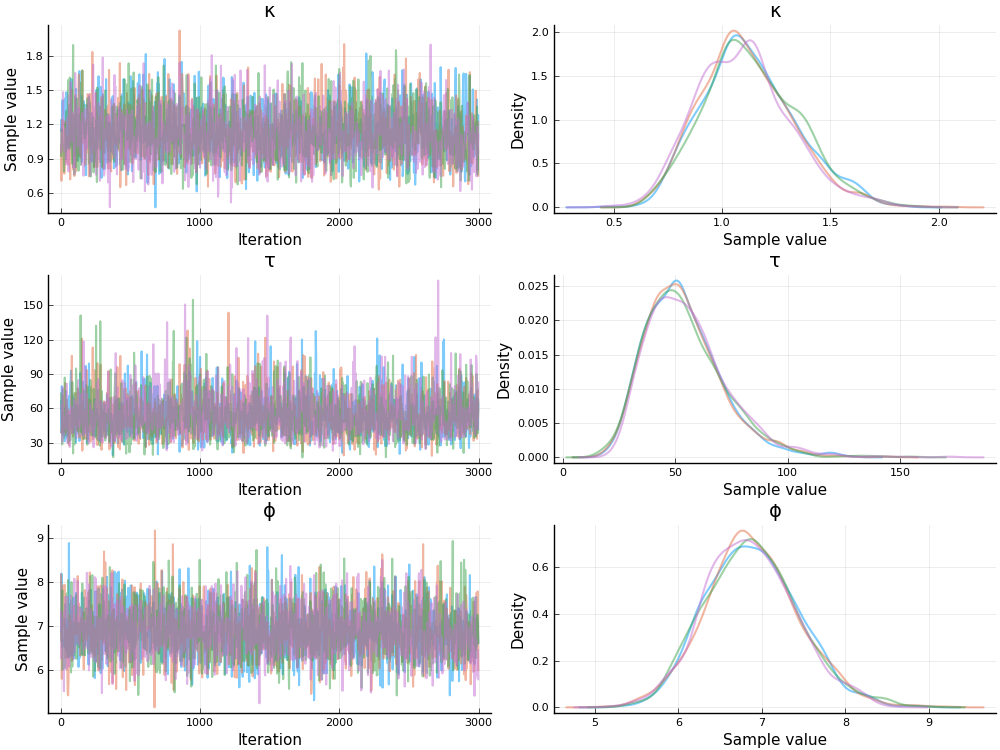

In [38]:
plot(turing_chains[[:κ, :ϕ, :τ]]; α = .5, linewidth=1.5)

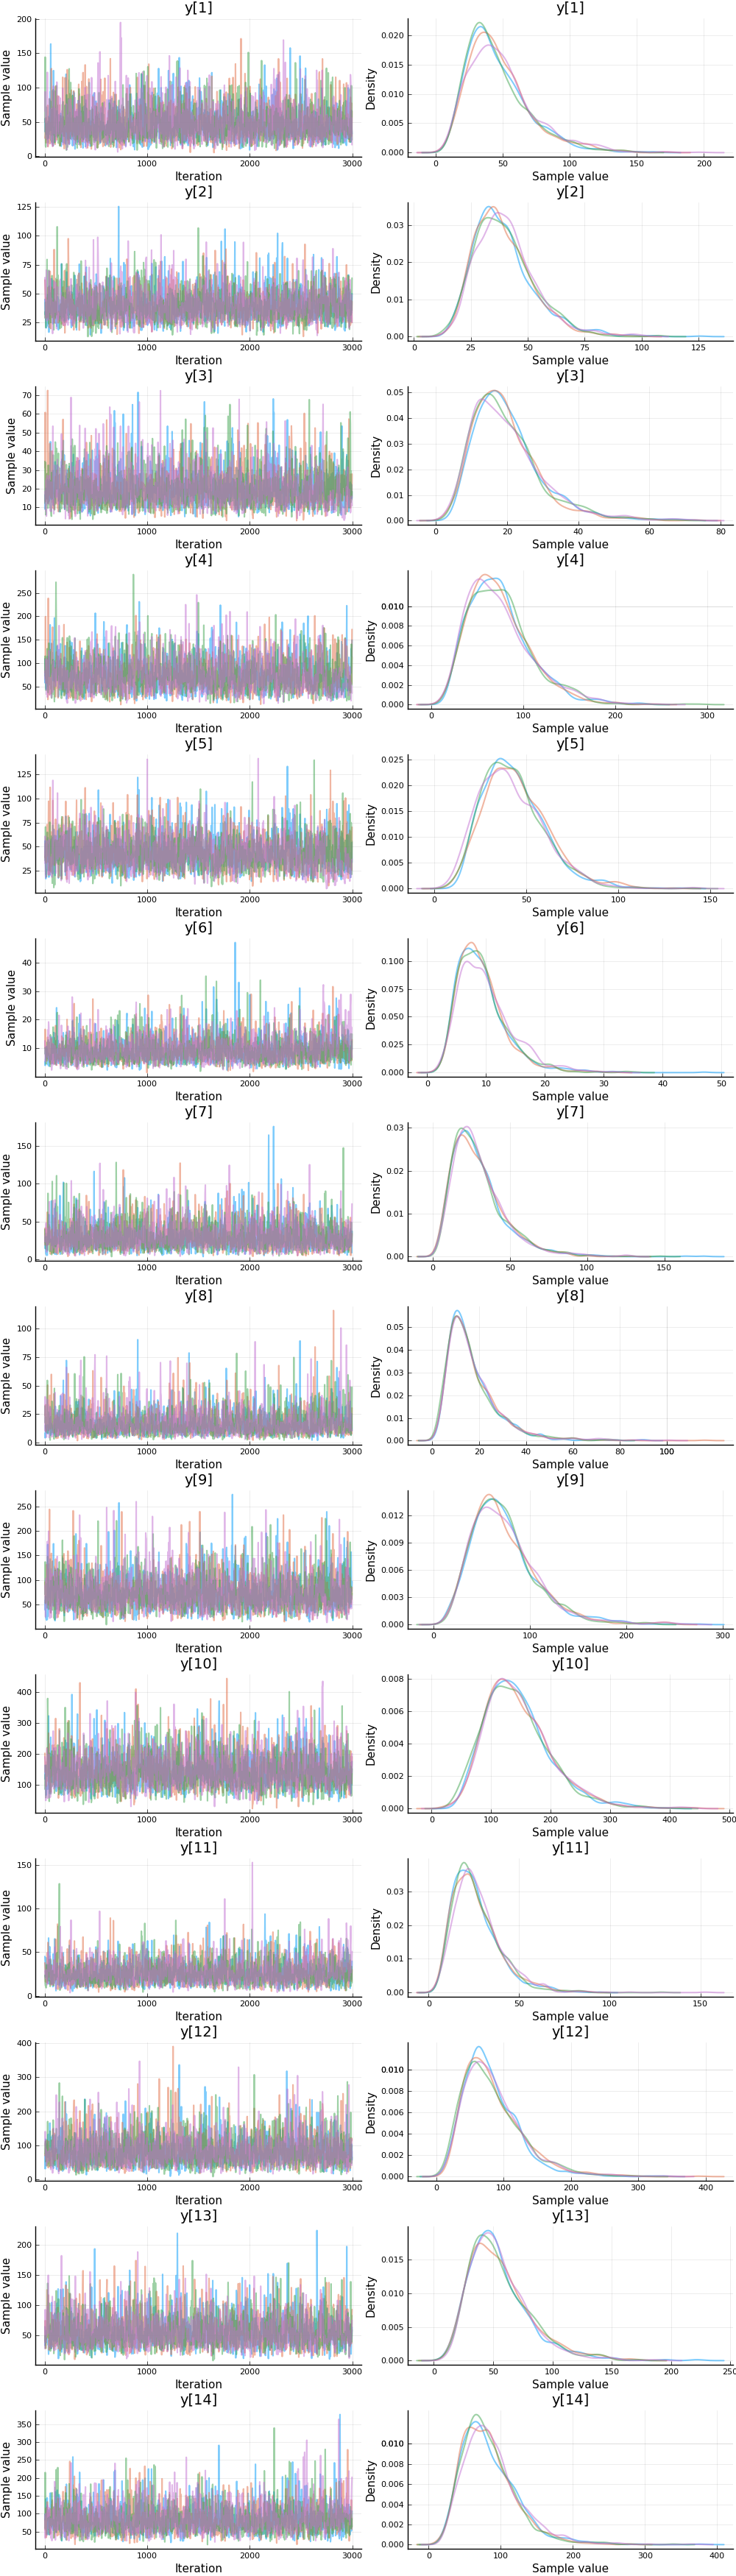

In [39]:
plot(turing_chains[[:y]]; α = .5, linewidth=1.5)

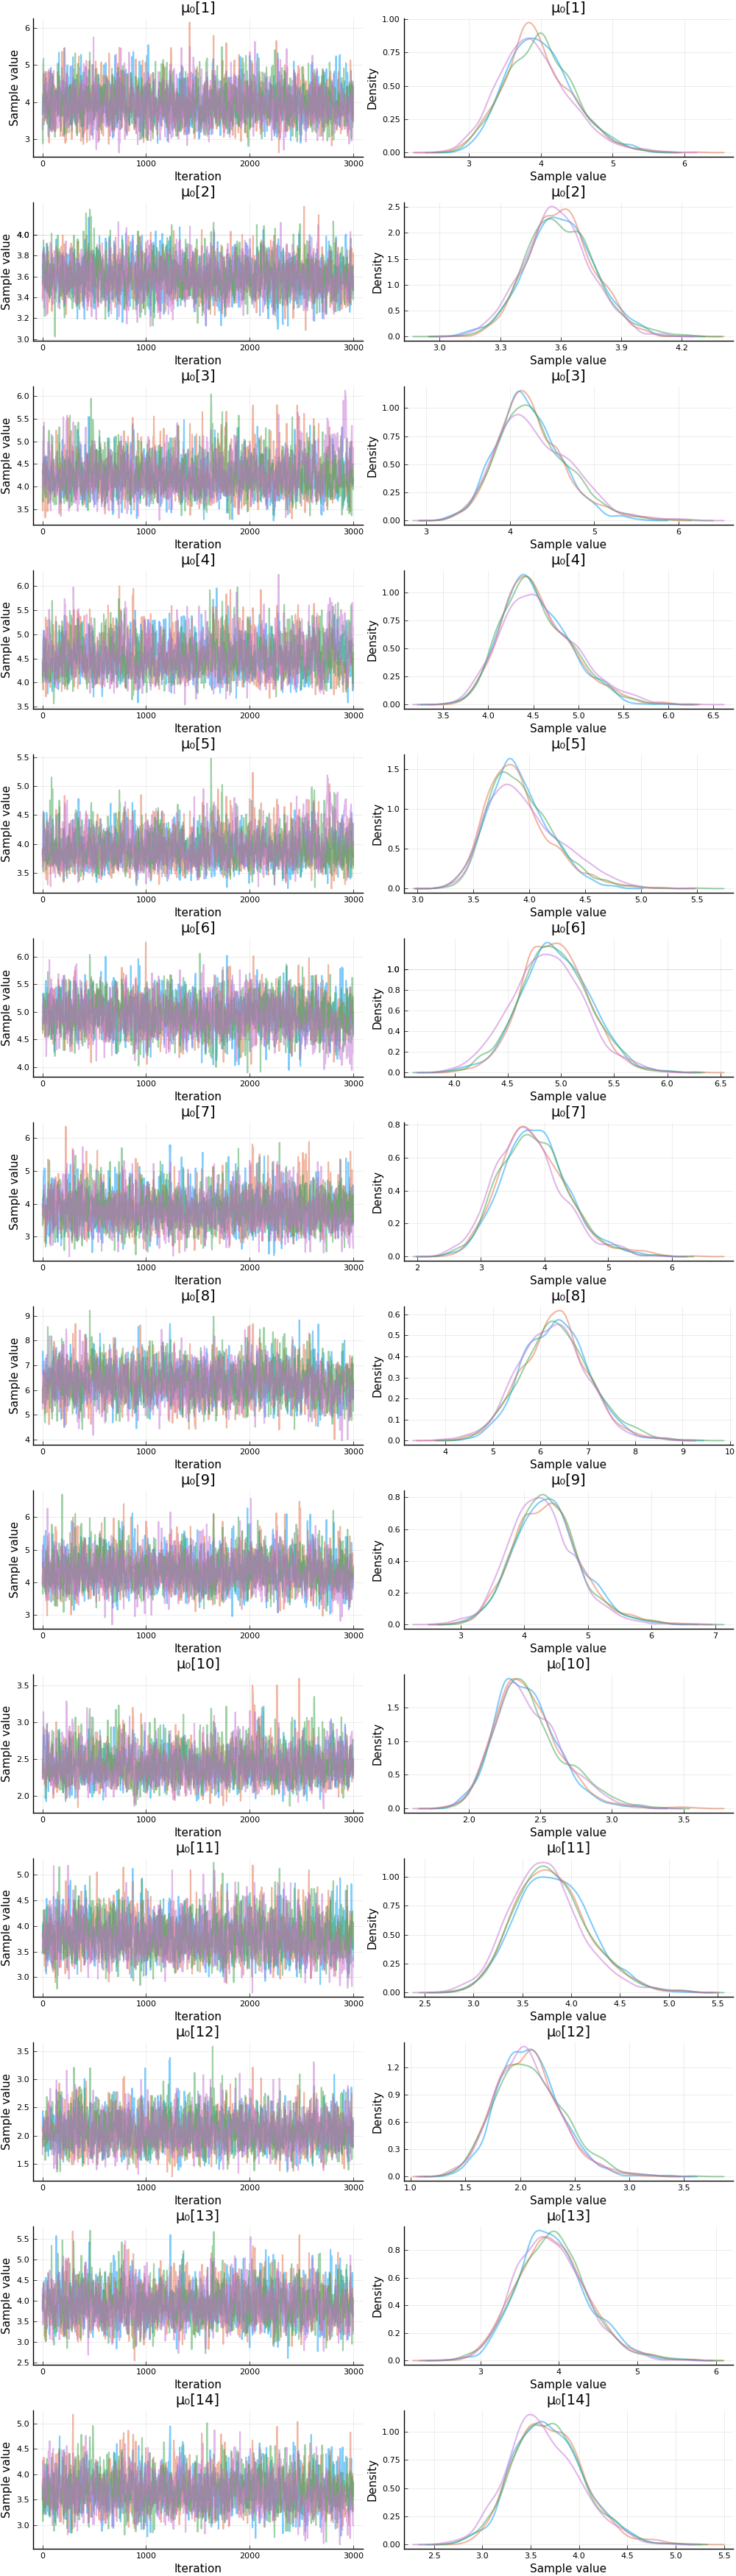

In [40]:
plot(turing_chains[:μ₀]; α = .5, linewidth=1.5)

# Predictions 

# Visualization

In [47]:
# Ehh, this can be improved.

function country_prediction_plot(country_idx, predictions_country::AbstractMatrix, e_deaths_country::AbstractMatrix, Rₜ_country::AbstractMatrix)
    p1 = bar(replace(data.deaths[country_idx], missing => 0.), label="$(countries[country_idx])")
    title!("Daily deaths")
    vline!([data.epidemic_start[country_idx]], label="epidemic start", linewidth=2)
    vline!([data.num_obs_countries[country_idx]], label="end of observations", linewidth=2)

    p2 = plot_confidence_timeseries(e_deaths_country; label = "$(countries[country_idx])")
    title!("Daily deaths (pred)")
    bar!(replace(data.deaths[country_idx], missing => 0.), label="$(countries[country_idx]) (observed)", alpha=0.5)

    p3 = plot_confidence_timeseries(Rₜ_country; label = "$(countries[country_idx])")
    for (c_idx, c_time) in enumerate(findfirst.(==(1), eachcol(data.covariates[country_idx])))
        if c_time !== nothing
            # c_name = names(covariates)[2:end][c_idx]
            c_name = names_covariates[c_idx]
            if (c_name != "any")
                # Don't add the "any intervention" stuff
                vline!([c_time - 1], label=c_name)
            end
        end
    end
    title!("Rₜ")
    ylims!(0, maximum(Rₜ_country) + 0.1)

    # p3 = bar(replace(data.cases[country_idx], missing => -1.), label="$(countries[country_idx])")
    # title!("Daily cases")

    p4 = plot_confidence_timeseries(predictions_country; label = "$(countries[country_idx])")
    title!("Daily cases (pred)")
    bar!(replace(data.cases[country_idx], missing => 0.), label="$(countries[country_idx]) (observed)", alpha=0.5)

    vals = cumsum(e_deaths_country; dims = 1)
    p5 = plot_confidence_timeseries(vals; label = "$(countries[country_idx])")
    plot!(cumsum([x for x in data.deaths[country_idx] if x > -1]), label="observed", color=:red)
    title!("Deaths (pred)")

    vals = cumsum(predictions_country; dims = 1)
    p6 = plot_confidence_timeseries(vals; label = "$(countries[country_idx])")
    plot!(cumsum([x for x in data.cases[country_idx] if x > -1]), label="observed", color=:red)
    title!("Cases (pred)")

    plot(p1, p3, p2, p4, p5, p6, layout=(6, 1), size=(900, 1200))
end
                                        
function country_prediction_plot(country_idx, cases, e_deaths, Rₜ)
    n = length(cases)
    e_deaths_country = hcat([e_deaths[t][country_idx] for t = 1:n]...)
    Rₜ_country = hcat([Rₜ[t][country_idx] for t = 1:n]...)
    predictions_country = hcat([cases[t][country_idx] for t = 1:n]...)

    return country_prediction_plot(country_idx, predictions_country, e_deaths_country, Rₜ_country)
end

country_prediction_plot (generic function with 2 methods)

## Predictive prior

In [49]:
# Compute the "generated quantities" for the PRIOR
generated_prior = vectup2tupvec(generated_quantities(m, chain_prior));
prediction_prior, expected_deaths_prior, Rₜ_prior = generated_prior;

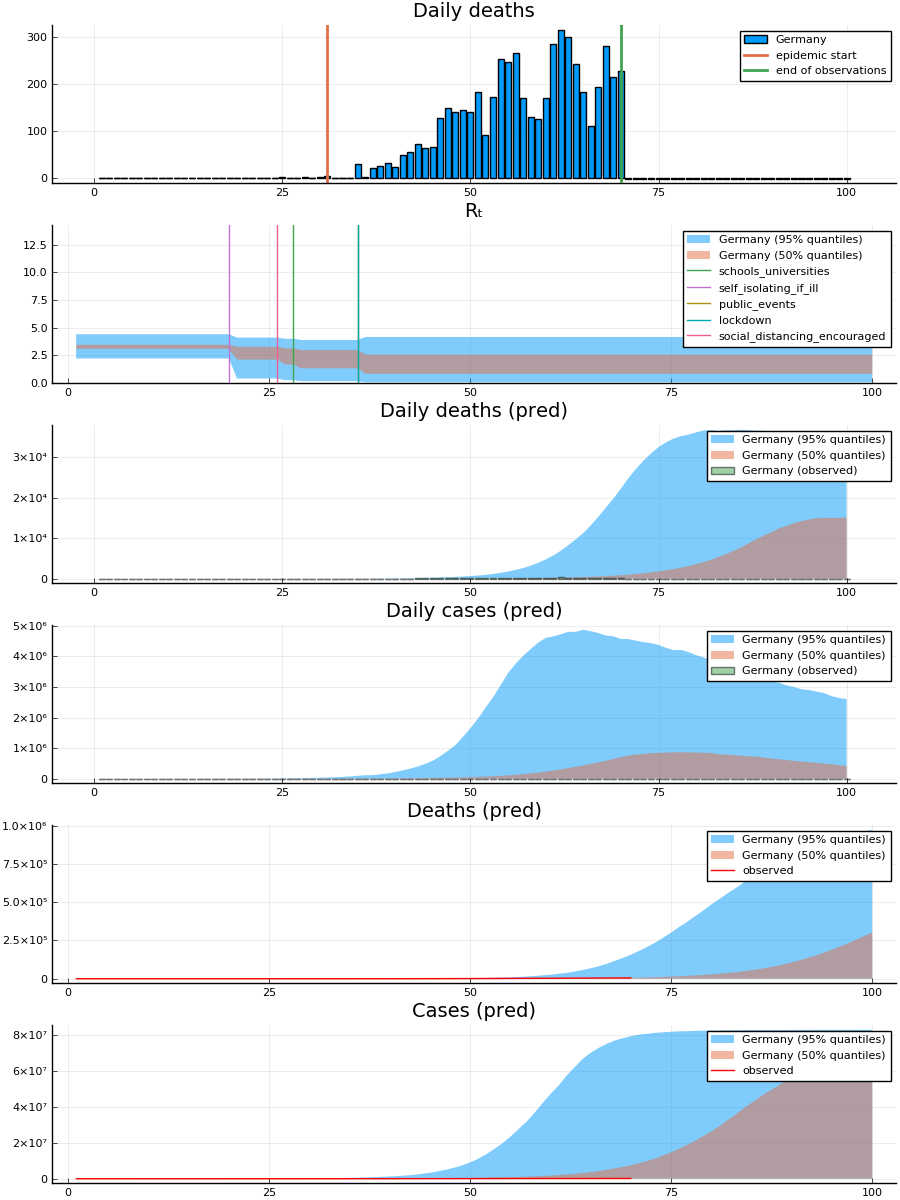

In [50]:
country_prediction_plot(3, generated_prior...)

# Predictive posterior

In [46]:
# Compute the "generated quantities" from the POSTERIOR

# Compute generated quantities for the chains separated
generated_turing_chains = [
    vectup2tupvec(generated_quantities(m, turing_chains[:, :, i])) 
    for i = MCMCChains.chains(turing_chains)
];

In [42]:
# Compute generated quantities for the chains pooled together
pooled_chains = MCMCChains.pool_chain(turing_chains)
generated_turing = vectup2tupvec(generated_quantities(m, pooled_chains));

In [104]:
generated_from_turing_using_stan = vectup2tupvec(generated_quantities(m, MCMCChains.pool_chain(stan_chains)));

BoundsError: BoundsError: attempt to access 0-element Array{Any,1} at index [1]

Object of type Chains, with data of type 1000×66×4 Array{Float64,3}

Iterations        = 1:2998
Thinning interval = 3
Chains            = 1, 2, 3, 4
Samples per chain = 1000
parameters        = ifr_noise[1], ifr_noise[2], ifr_noise[3], ifr_noise[4], ifr_noise[5], ifr_noise[6], ifr_noise[7], ifr_noise[8], ifr_noise[9], ifr_noise[10], ifr_noise[11], ifr_noise[12], ifr_noise[13], ifr_noise[14], kappa, alpha_hier[1], alpha_hier[2], alpha_hier[3], alpha_hier[4], alpha_hier[5], alpha_hier[6], phi, gamma, tau, lockdown[1], lockdown[2], lockdown[3], lockdown[4], lockdown[5], lockdown[6], lockdown[7], lockdown[8], lockdown[9], lockdown[10], lockdown[11], lockdown[12], lockdown[13], lockdown[14], mu[1], mu[2], mu[3], mu[4], mu[5], mu[6], mu[7], mu[8], mu[9], mu[10], mu[11], mu[12], mu[13], mu[14], y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8], y[9], y[10], y[11], y[12], y[13], y[14]

2-element Array{ChainDataFrame,1}

Summary Statistics
     parameters      mean      std  naive_se    mcse      

In [43]:
length(generated_turing)

3

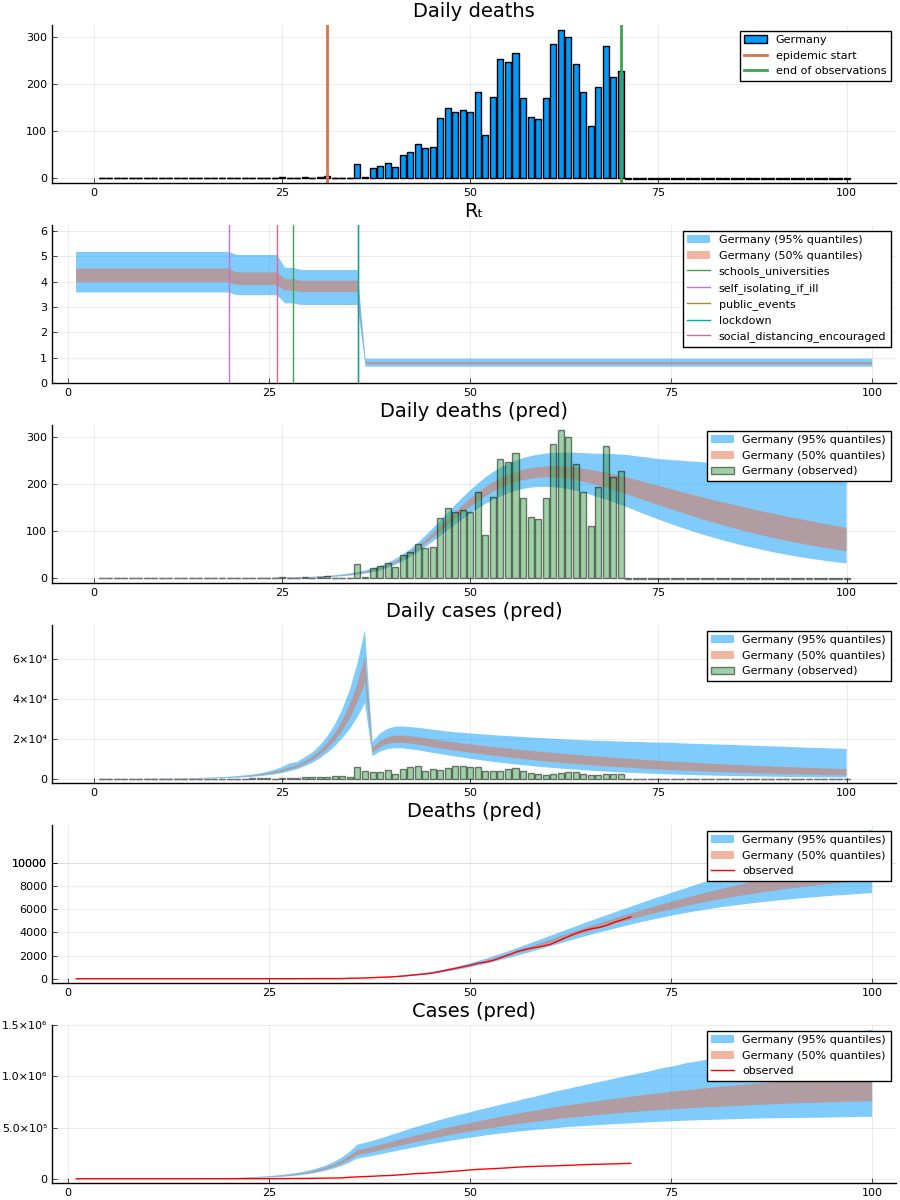

In [51]:
country_prediction_plot(3, generated_turing...)

In [52]:
country_prediction_plot(7, generated_chain...)

UndefVarError: UndefVarError: generated_chain not defined

# Counter-factual model

In [251]:
names_covariates

("schools_universities", "self_isolating_if_ill", "public_events", "any", "lockdown", "social_distancing_encouraged")

In [31]:
"""
    zero_covariates(xs::AbstractMatrix{<:Real}; exclude=[], include=[])

Allows you to zero out covariates if the name of the covariate is in `exclude` or NOT zero out those in `include`.
Note that only `exclude` xor `include` can be non-empty.

Useful when instantiating counter-factual models, as it allows one to remove/include a subset of the covariates.
"""
zero_covariates(xs::AbstractMatrix{<:Real}; kwargs...) = zero_covariates(xs, names_covariates; kwargs...)
function zero_covariates(xs::AbstractMatrix{<:Real}, names_covariates; exclude=[], include=[])
    @assert (isempty(exclude) || isempty(include)) "only `exclude` or `include` can be non-empty"
    
    if isempty(include)
        return hcat([
            (names_covariates[i] ∈ exclude ? zeros(eltype(c), length(c)) : c) 
            for (i, c) in enumerate(eachcol(xs))
        ]...)
    else
        return hcat([
        (names_covariates[i] ∈ include ? c : zeros(eltype(c), length(c))) 
        for (i, c) in enumerate(eachcol(xs))
        ]...)
    end
end

zero_covariates

In [253]:
# What happens if we never close schools?
m_counterfactual = model_def(
    data.num_countries,
    data.num_impute,
    data.num_obs_countries,
    data.num_total_days,
    data.cases,
    data.deaths,
    data.π,
    [zero_covariates(c; exclude = ["lockdown", "schools_universities"]) for c in data.covariates], # <= remove covariates
    data.epidemic_start,
    data.population,
    data.serial_intervals,
    true # <= use full model
);

In [254]:
# Compute the "generated quantities" for the PRIOR
generated_counterfactual = vectup2tupvec(generated_quantities(m_counterfactual, pooled_chains));
prediction_counterfactual, expected_deaths_counterfactual, Rₜ_counterfactual = generated_counterfactual;

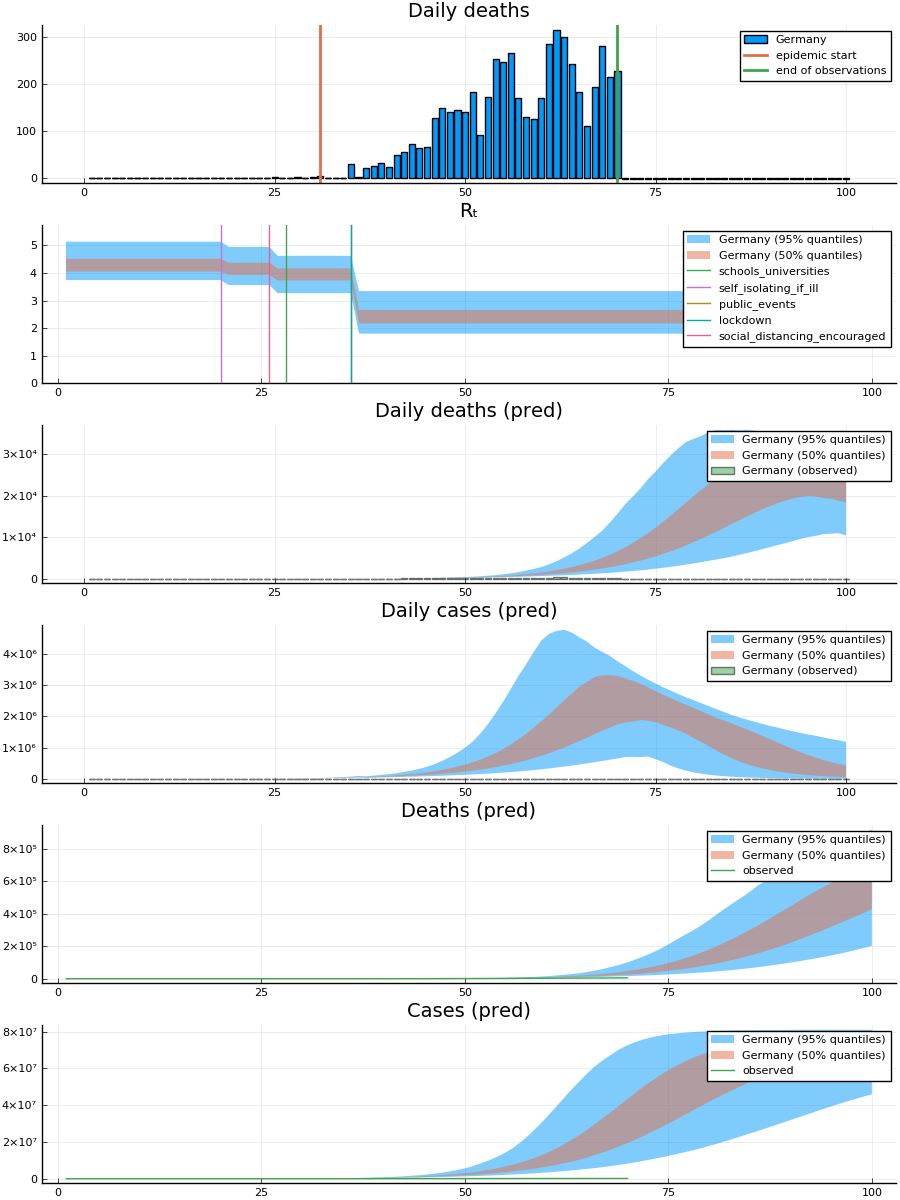

In [256]:
country_prediction_plot(3, generated_counterfactual...)

# Comparing with Stan

In [54]:
using PyCall

In [55]:
using PyCall: pyimport
pystan = pyimport("pystan")

PyObject <module 'pystan' from '/var/home/tef30/.local/lib/python3.5/site-packages/pystan/__init__.py'>

In [56]:
using LibGit2

imperialdir() = projectdir("external", "covid19model")
imperialdir(args...) = projectdir("external", "covid19model", args...)

if !ispath(imperialdir())
    mkpath(projectdir("external"))
    LibGit2.clone("https://github.com/ImperialCollegeLondon/covid19model.git", imperialdir())
end

## Stan model

In [57]:
model_str = raw"""
data {
  int <lower=1> M; // number of countries
  int <lower=1> P; // number of covariates
  int <lower=1> N0; // number of days for which to impute infections
  int<lower=1> N[M]; // days of observed data for country m. each entry must be <= N2
  int<lower=1> N2; // days of observed data + # of days to forecast
  int cases[N2,M]; // reported cases
  int deaths[N2, M]; // reported deaths -- the rows with i > N contain -1 and should be ignored
  matrix[N2, M] f; // h * s
  matrix[N2, P] X[M]; // features matrix
  int EpidemicStart[M];
  real pop[M];
  real SI[N2]; // fixed pre-calculated SI using emprical data from Neil
}

transformed data {
  vector[N2] SI_rev; // SI in reverse order
  vector[N2] f_rev[M]; // f in reversed order
  
  for(i in 1:N2)
    SI_rev[i] = SI[N2-i+1];
    
  for(m in 1:M){
    for(i in 1:N2) {
     f_rev[m, i] = f[N2-i+1,m];
    }
  }
}


parameters {
  real<lower=0> mu[M]; // intercept for Rt
  real<lower=0> alpha_hier[P]; // sudo parameter for the hier term for alpha
  real<lower=0> gamma;
  vector[M] lockdown;
  real<lower=0> kappa;
  real<lower=0> y[M];
  real<lower=0> phi;
  real<lower=0> tau;
  real <lower=0> ifr_noise[M];
}

transformed parameters {
    vector[P] alpha;
    matrix[N2, M] prediction = rep_matrix(0,N2,M);
    matrix[N2, M] E_deaths  = rep_matrix(0,N2,M);
    matrix[N2, M] Rt = rep_matrix(0,N2,M);
    matrix[N2, M] Rt_adj = Rt;
    
    {
      matrix[N2,M] cumm_sum = rep_matrix(0,N2,M);
      for(i in 1:P){
        alpha[i] = alpha_hier[i] - ( log(1.05) / 6.0 );
      }
      for (m in 1:M){
        prediction[1:N0,m] = rep_vector(y[m],N0); // learn the number of cases in the first N0 days
        cumm_sum[2:N0,m] = cumulative_sum(prediction[2:N0,m]);
        
        Rt[,m] = mu[m] * exp(-X[m] * alpha - X[m][,5] * lockdown[m]);
        Rt_adj[1:N0,m] = Rt[1:N0,m];
        for (i in (N0+1):N2) {
          real convolution = dot_product(sub_col(prediction, 1, m, i-1), tail(SI_rev, i-1));
          cumm_sum[i,m] = cumm_sum[i-1,m] + prediction[i-1,m];
          Rt_adj[i,m] = ((pop[m]-cumm_sum[i,m]) / pop[m]) * Rt[i,m];
          prediction[i, m] = Rt_adj[i,m] * convolution;
        }
        E_deaths[1, m]= 1e-15 * prediction[1,m];
        for (i in 2:N2){
          E_deaths[i,m] = ifr_noise[m] * dot_product(sub_col(prediction, 1, m, i-1), tail(f_rev[m], i-1));
        }
      }
    }
}
model {
  tau ~ exponential(0.03);
  for (m in 1:M){
      y[m] ~ exponential(1/tau);
  }
  gamma ~ normal(0,.2);
  lockdown ~ normal(0,gamma);
  phi ~ normal(0,5);
  kappa ~ normal(0,0.5);
  mu ~ normal(3.28, kappa); // citation: https://academic.oup.com/jtm/article/27/2/taaa021/5735319
  alpha_hier ~ gamma(.1667,1);
  ifr_noise ~ normal(1,0.1);
  for(m in 1:M){
    deaths[EpidemicStart[m]:N[m], m] ~ neg_binomial_2(E_deaths[EpidemicStart[m]:N[m], m], phi);
   }
}

generated quantities {
    matrix[N2, M] prediction0 = rep_matrix(0,N2,M);
    matrix[N2, M] E_deaths0  = rep_matrix(0,N2,M);
    
    {
      matrix[N2,M] cumm_sum0 = rep_matrix(0,N2,M);
      for (m in 1:M){
         for (i in 2:N0){
          cumm_sum0[i,m] = cumm_sum0[i-1,m] + y[m]; 
        }
        prediction0[1:N0,m] = rep_vector(y[m],N0); 
        for (i in (N0+1):N2) {
          real convolution0 = dot_product(sub_col(prediction0, 1, m, i-1), tail(SI_rev, i-1));
          cumm_sum0[i,m] = cumm_sum0[i-1,m] + prediction0[i-1,m];
          prediction0[i, m] = ((pop[m]-cumm_sum0[i,m]) / pop[m]) * mu[m] * convolution0;
        }
        E_deaths0[1, m]= 1e-15 * prediction0[1,m];
        for (i in 2:N2){
          E_deaths0[i,m] = ifr_noise[m] * dot_product(sub_col(prediction0, 1, m, i-1), tail(f_rev[m], i-1));
        }
      }
    }
}
""";

## Convert data to Stan format

In [58]:
keys(rdata)

Base.KeySet for a Dict{String,Int64} with 14 entries. Keys:
  "SI"
  "deaths"
  "f"
  "P"
  "pop"
  "x"
  "N0"
  "N2"
  "M"
  "N"
  "EpidemicStart"
  "X"
  "features"
  "cases"

In [59]:
d = Dict([(k, rdata[k]) for k in keys(rdata)]) # `values(df)` and `keys(df)` have different ordering so DON'T do `Dict(keys(df), values(df))`

Dict{String,Any} with 14 entries:
  "SI"            => [0.0183262, 0.0665923, 0.101914, 0.117717, 0.118386, 0.109…
  "deaths"        => [0 0 … 0 0; 0 0 … 0 0; … ; -1 -1 … -1 -1; -1 -1 … -1 -1]
  "f"             => [1.02075e-8 1.24496e-8 … 1.17259e-8 1.02898e-8; 4.69544e-7…
  "P"             => 6
  "pop"           => Int32[5792203, 60461828, 83783945, 46754783, 67886004, 652…
  "x"             => Any[]
  "N0"            => 6
  "N2"            => 100
  "M"             => 14
  "N"             => Int32[64, 89, 70, 76, 73, 78, 61, 67, 63, 67, 71, 64, 64, …
  "EpidemicStart" => [31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
  "X"             => [0.0 0.0 … 1.0 1.0; 0.0 0.0 … 1.0 1.0; … ; 0.0 0.0 … 1.0 1…
  "features"      => Any[]
  "cases"         => [0 0 … 0 0; 0 0 … 0 0; … ; -1 -1 … -1 -1; -1 -1 … -1 -1]

## Load & construct chains

In [60]:
using Serialization

la = open(io -> deserialize(io), savename("stan_fit", parameters, "jls"), "r")

Dict{Any,Any} with 17 entries:
  "E_deaths"    => [6.52866e-14 5.9334e-7 … 2.40106 2.31387; 4.77975e-14 3.5296…
  "ifr_noise"   => [0.890352 1.05228 … 1.19123 0.833645; 0.723459 1.03243 … 0.8…
  "alpha"       => [-0.00813169 -0.00812908 … 0.723476 -0.00112684; 0.237363 0.…
  "E_deaths0"   => [6.52866e-14 5.9334e-7 … 83.0411 71.0609; 4.77975e-14 3.5296…
  "tau"         => [53.4179, 96.0101, 38.1312, 68.78, 49.8292, 45.3714, 80.3358…
  "Rt_adj"      => [3.69848 3.69848 … 0.762185 0.762171; 4.19599 4.19599 … 0.77…
  "mu"          => [3.69848 3.8664 … 3.68493 4.11784; 4.19599 3.8219 … 4.09925 …
  "prediction0" => [65.2866 65.2866 … 1.56204 1.22123; 47.7975 47.7975 … 0.1296…
  "lp__"        => [5.60668e5, 5.6068e5, 5.60685e5, 5.6067e5, 5.60671e5, 5.6069…
  "kappa"       => [1.05947, 0.913342, 1.05901, 1.17966, 1.12473, 1.21213, 0.99…
  "alpha_hier"  => [1.73288e-16 2.6161e-6 … 0.731608 0.00700485; 0.245495 0.023…
  "prediction"  => [65.2866 65.2866 … 106.091 102.225; 47.7975 47.7975 … 206.1

In [ ]:
rename!(la, )

In [61]:
la_subset = Dict(
    k => la[k] for k in 
    ["y", "kappa", "alpha_hier", "phi", "tau", "ifr_noise", "mu", "gamma", "lockdown"]
)

Dict{String,Array{Float64,N} where N} with 9 entries:
  "ifr_noise"  => [0.890352 1.05228 … 1.19123 0.833645; 0.723459 1.03243 … 0.89…
  "kappa"      => [1.05947, 0.913342, 1.05901, 1.17966, 1.12473, 1.21213, 0.997…
  "alpha_hier" => [1.73288e-16 2.6161e-6 … 0.731608 0.00700485; 0.245495 0.0236…
  "phi"        => [6.8105, 7.36518, 6.41771, 7.13139, 6.70706, 7.06452, 7.04253…
  "gamma"      => [0.107149, 0.129599, 0.118666, 0.274338, 0.179847, 0.0386703,…
  "tau"        => [53.4179, 96.0101, 38.1312, 68.78, 49.8292, 45.3714, 80.3358,…
  "lockdown"   => [-0.0199127 0.0841175 … -0.0854961 0.245588; 0.00700599 0.025…
  "mu"         => [3.69848 3.8664 … 3.68493 4.11784; 4.19599 3.8219 … 4.09925 3…
  "y"          => [65.2866 22.1974 … 75.7377 63.0177; 47.7975 27.7832 … 48.4006…

In [62]:
function MCMCChains._cat(::Val{3}, c1::Chains, args::Chains...)
    # check inputs
    rng = range(c1)
    # (OR not, he he he)
    # all(c -> range(c) == rng, args) || throw(ArgumentError("chain ranges differ"))
    nms = names(c1)
    all(c -> names(c) == nms, args) || throw(ArgumentError("chain names differ"))

    # concatenate all chains
    data = mapreduce(c -> c.value.data, (x, y) -> cat(x, y; dims = 3), args;
                     init = c1.value.data)
    value = MCMCChains.AxisArray(data; iter = rng, var = nms, chain = 1:size(data, 3))

    return Chains(value, missing, c1.name_map, c1.info)
end

In [63]:
stan_chain = Chains(la_subset); # <= results in all chains being concatenated together

In [64]:
steps_per_chain = parameters.steps # Int(length(stan_chain) // num_chains)
num_chains = Int(length(stan_chain) // steps_per_chain)

stan_chains = [stan_chain[1 + (i - 1) * steps_per_chain:i * steps_per_chain] for i = 1:num_chains];
stan_chains = chainscat(stan_chains...);

In [65]:
stan_chains = stan_chains[1:3:end] # thin

Object of type Chains, with data of type 1000×66×4 Array{Float64,3}

Iterations        = 1:2998
Thinning interval = 3
Chains            = 1, 2, 3, 4
Samples per chain = 1000
parameters        = ifr_noise[1], ifr_noise[2], ifr_noise[3], ifr_noise[4], ifr_noise[5], ifr_noise[6], ifr_noise[7], ifr_noise[8], ifr_noise[9], ifr_noise[10], ifr_noise[11], ifr_noise[12], ifr_noise[13], ifr_noise[14], kappa, alpha_hier[1], alpha_hier[2], alpha_hier[3], alpha_hier[4], alpha_hier[5], alpha_hier[6], phi, gamma, tau, lockdown[1], lockdown[2], lockdown[3], lockdown[4], lockdown[5], lockdown[6], lockdown[7], lockdown[8], lockdown[9], lockdown[10], lockdown[11], lockdown[12], lockdown[13], lockdown[14], mu[1], mu[2], mu[3], mu[4], mu[5], mu[6], mu[7], mu[8], mu[9], mu[10], mu[11], mu[12], mu[13], mu[14], y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8], y[9], y[10], y[11], y[12], y[13], y[14]

2-element Array{ChainDataFrame,1}

Summary Statistics
     parameters      mean      std  naive_se    mcse      

## Comparison

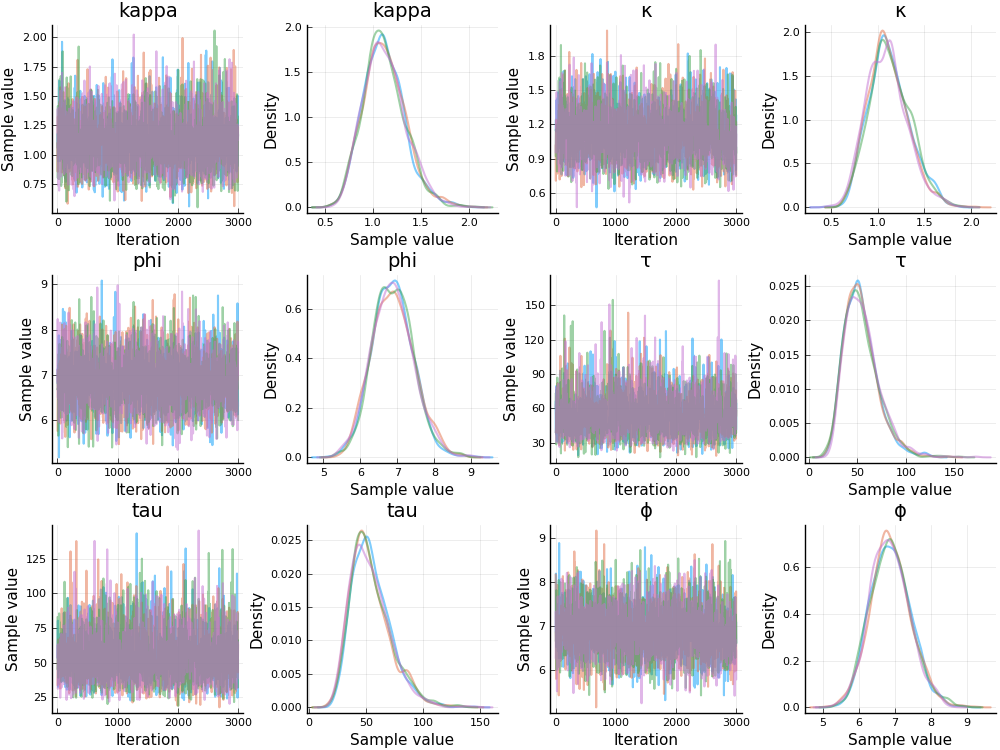

In [70]:
p1 = plot(stan_chains[[:tau, :phi, :kappa]]; α = .5, linewidth=1.5);
p2 = plot(turing_chains[[:τ, :ϕ, :κ]]; α = .5, linewidth=1.5);

plot(p1, p2, layout = (1, 2))

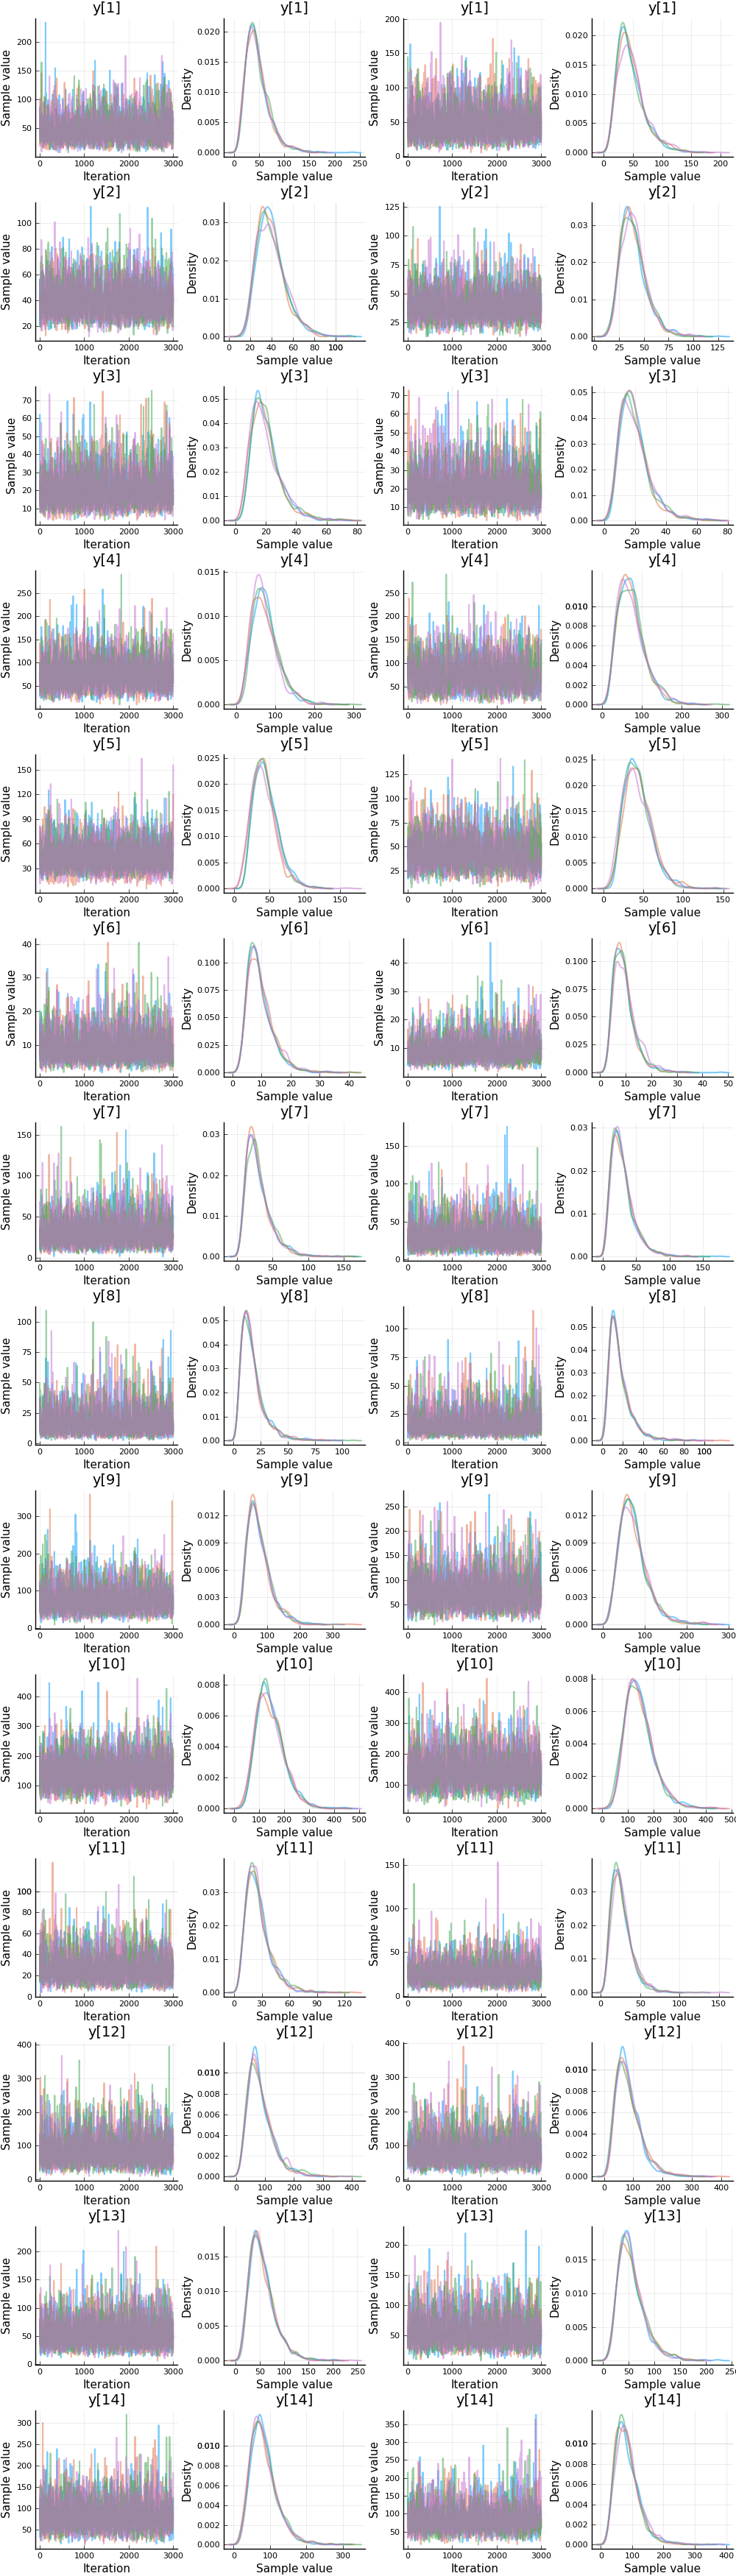

In [71]:
p1 = plot(stan_chains[:y]; α = .5, linewidth=1.5);
p2 = plot(turing_chains[:y]; α = .5, linewidth=1.5);

plot(p1, p2, layout = (1, 2))

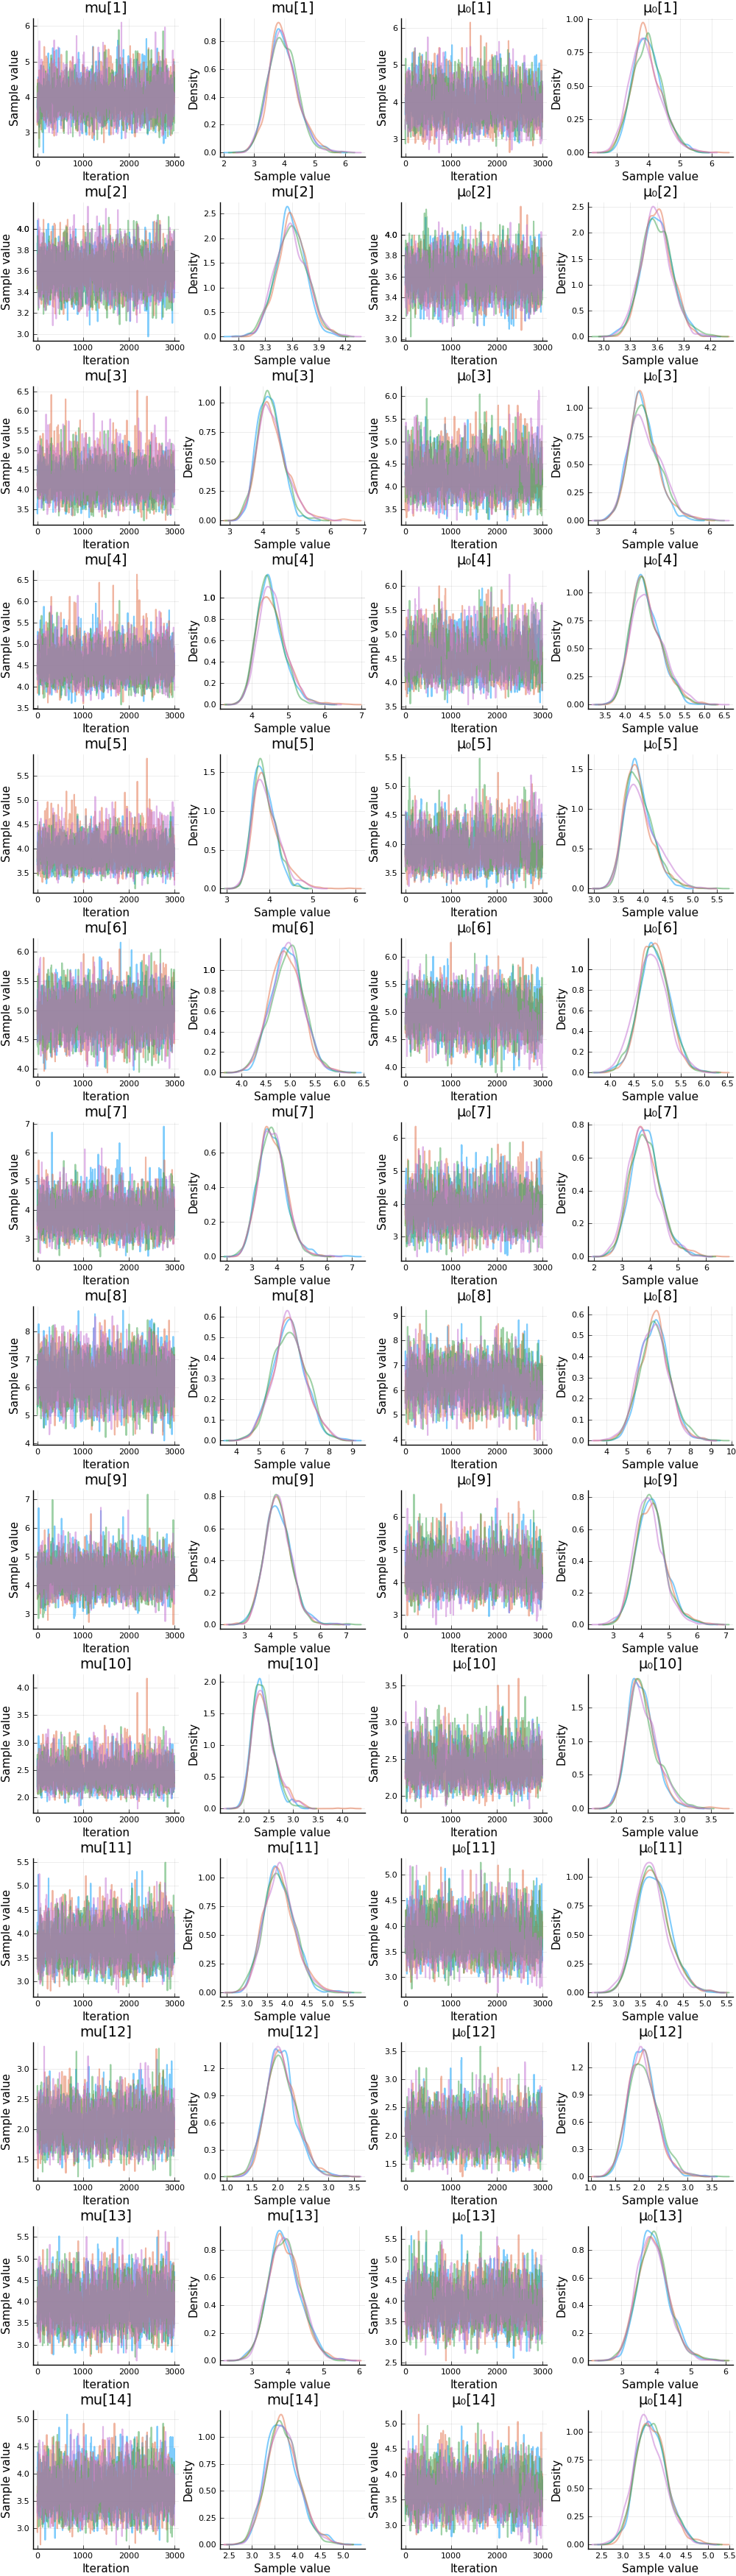

In [72]:
p1 = plot(stan_chains[:mu]; α = .5, linewidth=1.5);
p2 = plot(turing_chains[:μ₀]; α = .5, linewidth=1.5);

plot(p1, p2, layout = (1, 2))

In [79]:
Rₜ_chain = generated_turing[3];

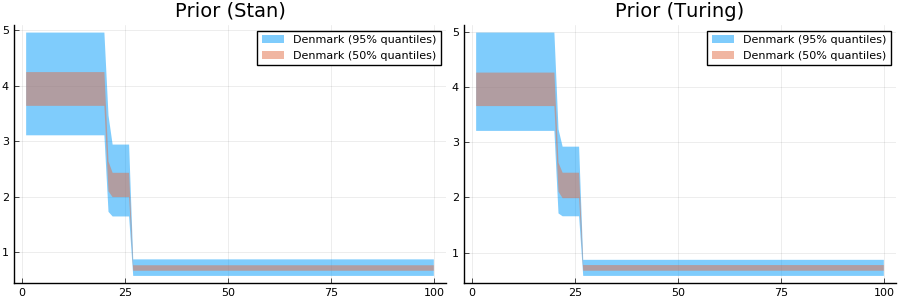

In [80]:
country_idx = 1

vals = la["Rt"][:, :, country_idx]'
p1 = plot_confidence_timeseries(vals; label = "$(countries[country_idx])")
title!("Prior (Stan)")

vals = hcat([Rₜ_chain[i][country_idx] for i = 1:length(turing_chains)]...)
p2 = plot_confidence_timeseries(vals; label = "$(countries[country_idx])")
title!("Prior (Turing)")

plot(p1, p2; layout = (1, 2), size = (900, 300))

In [81]:
country_idx = 2

vals = la["Rt"][:, :, country_idx]'
p1 = plot_confidence_timeseries(vals; label = "$(countries[country_idx])")
title!("Prior (Stan)")

vals = hcat([Rₜ_chain[i][country_idx] for i = 1:length(turing_chains)]...)
p2 = plot_confidence_timeseries(vals; label = "$(countries[country_idx])")
title!("Prior (Turing)")

plot(p1, p2; layout = (1, 2), size = (900, 300))

UndefVarError: UndefVarError: chain not defined

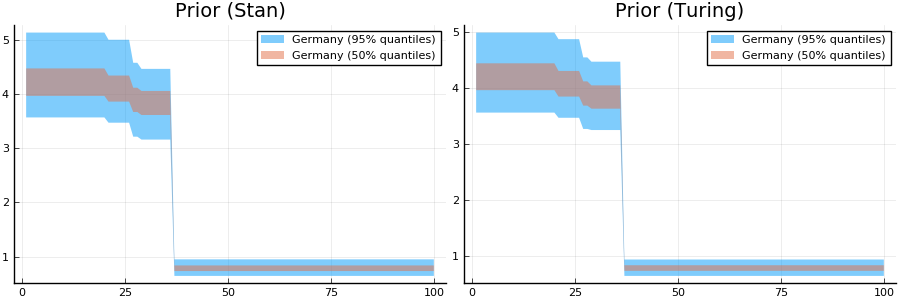

In [83]:
country_idx = 3

vals = la["Rt"][:, :, country_idx]'
p1 = plot_confidence_timeseries(vals; label = "$(countries[country_idx])")
title!("Prior (Stan)")

vals = hcat([Rₜ_chain[i][country_idx] for i = 1:length(turing_chains)]...)
p2 = plot_confidence_timeseries(vals; label = "$(countries[country_idx])")
title!("Prior (Turing)")

plot(p1, p2; layout = (1, 2), size = (900, 300))

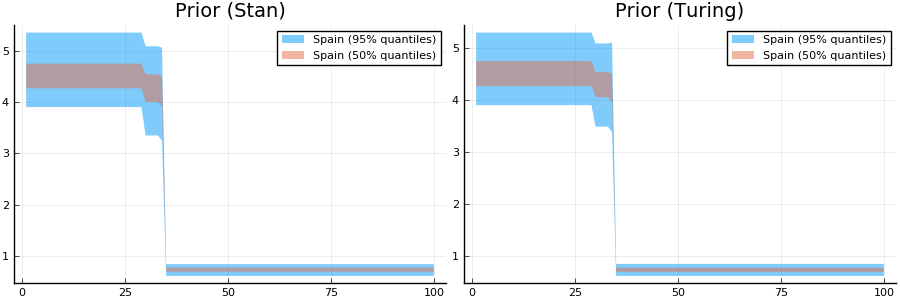

In [84]:
country_idx = 4

vals = la["Rt"][:, :, country_idx]'
p1 = plot_confidence_timeseries(vals; label = "$(countries[country_idx])")
title!("Prior (Stan)")

vals = hcat([Rₜ_chain[i][country_idx] for i = 1:length(turing_chains)]...)
p2 = plot_confidence_timeseries(vals; label = "$(countries[country_idx])")
title!("Prior (Turing)")

plot(p1, p2; layout = (1, 2), size = (900, 300))

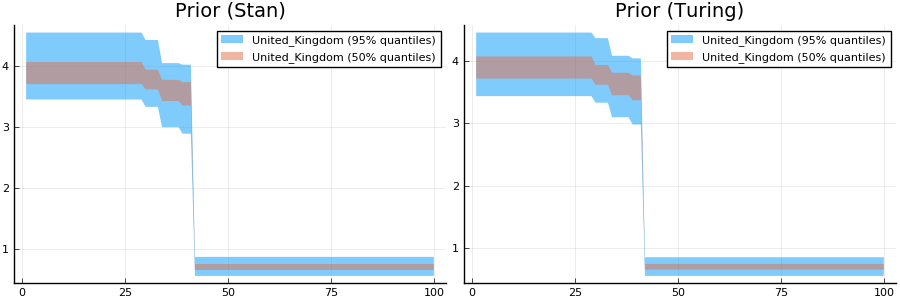

In [85]:
country_idx = 5

vals = la["Rt"][:, :, country_idx]'
p1 = plot_confidence_timeseries(vals; label = "$(countries[country_idx])")
title!("Prior (Stan)")

vals = hcat([Rₜ_chain[i][country_idx] for i = 1:length(turing_chains)]...)
p2 = plot_confidence_timeseries(vals; label = "$(countries[country_idx])")
title!("Prior (Turing)")

plot(p1, p2; layout = (1, 2), size = (900, 300))

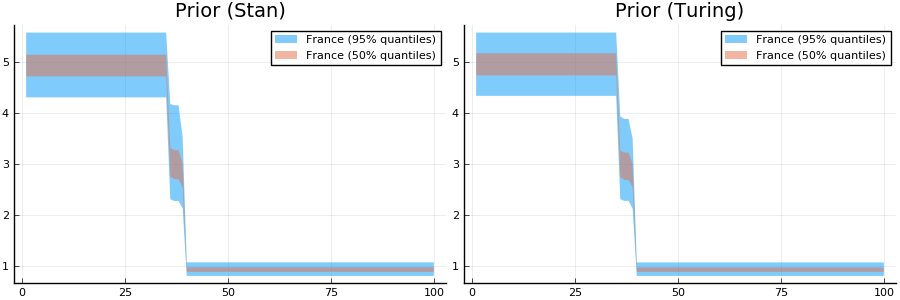

In [86]:
country_idx = 6

vals = la["Rt"][:, :, country_idx]'
p1 = plot_confidence_timeseries(vals; label = "$(countries[country_idx])")
title!("Prior (Stan)")

vals = hcat([Rₜ_chain[i][country_idx] for i = 1:length(turing_chains)]...)
p2 = plot_confidence_timeseries(vals; label = "$(countries[country_idx])")
title!("Prior (Turing)")

plot(p1, p2; layout = (1, 2), size = (900, 300))

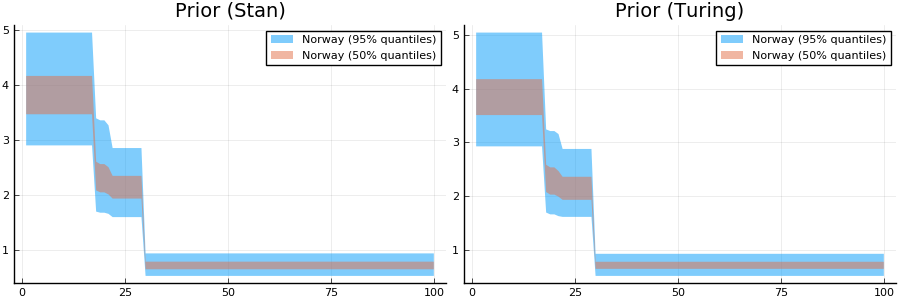

In [87]:
country_idx = 7

vals = la["Rt"][:, :, country_idx]'
p1 = plot_confidence_timeseries(vals; label = "$(countries[country_idx])")
title!("Prior (Stan)")

vals = hcat([Rₜ_chain[i][country_idx] for i = 1:length(turing_chains)]...)
p2 = plot_confidence_timeseries(vals; label = "$(countries[country_idx])")
title!("Prior (Turing)")

plot(p1, p2; layout = (1, 2), size = (900, 300))

## Comparing the generated quantities

In [90]:
predictions_stan = [transpose(la["prediction"][:, :, m]) for m = 1:data.num_countries]
expected_deaths_stan = [transpose(la["E_deaths"][:, :, m]) for m = 1:data.num_countries]
Rₜ_stan = [transpose(la["Rt"][:, :, m]) for m = 1:data.num_countries];

function country_stan_prediction_plot(country_idx)
    e_deaths_country = expected_deaths_stan[country_idx]
    Rₜ_country = Rₜ_stan[country_idx]
    predictions_country = predictions_stan[country_idx]

    return country_prediction_plot(country_idx, predictions_country, e_deaths_country, Rₜ_country)
end

country_stan_prediction_plot (generic function with 1 method)

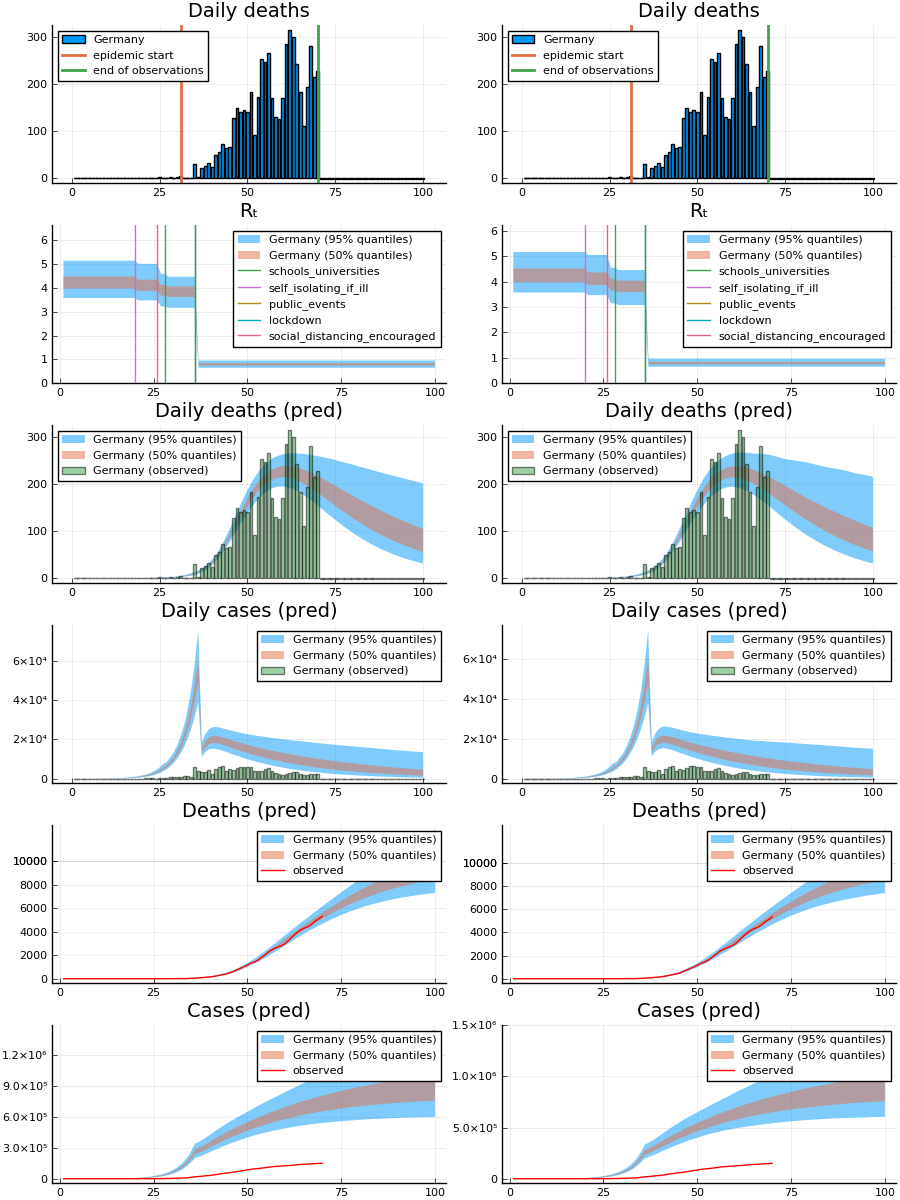

In [92]:
plot(country_stan_prediction_plot(3), country_prediction_plot(3, generated_turing...), layout=(1, 2))

## Sampling from the prior

This approach to sampling from the prior using Stan comes from https://betanalpha.github.io/assets/case_studies/principled_bayesian_workflow.html#step-four-build-a-model

In [93]:
stan_prior_model_str = """
data {
  int <lower=1> M; // number of countries
  int <lower=1> P; // number of covariates
  int <lower=1> N0; // number of days for which to impute infections
  int<lower=1> N[M]; // days of observed data for country m. each entry must be <= N2
  int<lower=1> N2; // days of observed data + # of days to forecast
  int cases[N2,M]; // reported cases
  int deaths[N2, M]; // reported deaths -- the rows with i > N contain -1 and should be ignored
  matrix[N2, M] f; // h * s
  matrix[N2, P] X[M]; // features matrix
  int EpidemicStart[M];
  real pop[M];
  real SI[N2]; // fixed pre-calculated SI using emprical data from Neil
}

transformed data {
  vector[N2] SI_rev; // SI in reverse order
  vector[N2] f_rev[M]; // f in reversed order
  
  for(i in 1:N2)
    SI_rev[i] = SI[N2-i+1];
    
  for(m in 1:M){
    for(i in 1:N2) {
      f_rev[m, i] = f[N2-i+1,m];
    }
  }
}


generated quantities {
  real<lower=0> mu[M]; // intercept for Rt
  real<lower=0> alpha_hier[P]; // sudo parameter for the hier term for alpha
  real<lower=0> gamma;
  vector[M] lockdown;
  real<lower=0> kappa;
  real<lower=0> y[M];
  real<lower=0> phi;
  real<lower=0> tau;
  real <lower=0> ifr_noise[M];

  vector[P] alpha;
  matrix[N2, M] prediction = rep_matrix(0,N2,M);
  matrix[N2, M] E_deaths  = rep_matrix(0,N2,M);
  matrix[N2, M] Rt = rep_matrix(0,N2,M);
  matrix[N2, M] Rt_adj = Rt;

  matrix[N2, M] prediction0 = rep_matrix(0,N2,M);
  matrix[N2, M] E_deaths0  = rep_matrix(0,N2,M);
  
  tau = exponential_rng(0.03);
  for (m in 1:M){
    y[m] = exponential_rng(1/tau);
  }
  gamma = fabs(normal_rng(0,.2));
  for (m in 1:M) lockdown[m] = normal_rng(0, fabs(gamma));
  phi = fabs(normal_rng(0,5));
  kappa = fabs(normal_rng(0,0.5));
  for (m in 1:M) mu[m] = fabs(normal_rng(3.28, kappa)); // citation: https://academic.oup.com/jtm/article/27/2/taaa021/5735319
  for (m in 1:P) alpha_hier[m] = gamma_rng(.1667,1);
  for (m in 1:M) ifr_noise[m] = fabs(normal_rng(1,0.1));

  /* Remove observation statements */
  /* for(m in 1:M){ */
  /*   deaths[EpidemicStart[m]:N[m], m] = neg_binomial_2_rng(E_deaths[EpidemicStart[m]:N[m], m], phi); */
  /* } */

  {
    matrix[N2,M] cumm_sum = rep_matrix(0,N2,M);
    for(i in 1:P){
      alpha[i] = alpha_hier[i] - ( log(1.05) / 6.0 );
    }
    for (m in 1:M){
      prediction[1:N0,m] = rep_vector(y[m],N0); // learn the number of cases in the first N0 days
      cumm_sum[2:N0,m] = cumulative_sum(prediction[2:N0,m]);
        
      Rt[,m] = mu[m] * exp(-X[m] * alpha - X[m][,5] * lockdown[m]);
      Rt_adj[1:N0,m] = Rt[1:N0,m];
      for (i in (N0+1):N2) {
        real convolution = dot_product(sub_col(prediction, 1, m, i-1), tail(SI_rev, i-1));
        cumm_sum[i,m] = cumm_sum[i-1,m] + prediction[i-1,m];
        Rt_adj[i,m] = ((pop[m]-cumm_sum[i,m]) / pop[m]) * Rt[i,m];
        prediction[i, m] = Rt_adj[i,m] * convolution;
      }
      E_deaths[1, m]= 1e-15 * prediction[1,m];
      for (i in 2:N2){
        E_deaths[i,m] = ifr_noise[m] * dot_product(sub_col(prediction, 1, m, i-1), tail(f_rev[m], i-1));
      }
    }
  }

  /* Counter-factual */  
  {
    matrix[N2,M] cumm_sum0 = rep_matrix(0,N2,M);
    for (m in 1:M){
      for (i in 2:N0){
        cumm_sum0[i,m] = cumm_sum0[i-1,m] + y[m]; 
      }
      prediction0[1:N0,m] = rep_vector(y[m],N0); 
      for (i in (N0+1):N2) {
        real convolution0 = dot_product(sub_col(prediction0, 1, m, i-1), tail(SI_rev, i-1));
        cumm_sum0[i,m] = cumm_sum0[i-1,m] + prediction0[i-1,m];
        prediction0[i, m] = ((pop[m]-cumm_sum0[i,m]) / pop[m]) * mu[m] * convolution0;
      }
      E_deaths0[1, m]= 1e-15 * prediction0[1,m];
      for (i in 2:N2){
        E_deaths0[i,m] = ifr_noise[m] * dot_product(sub_col(prediction0, 1, m, i-1), tail(f_rev[m], i-1));
      }
    }
  }
}


""";

In [94]:
sm_prior = pystan.StanModel(model_code=stan_prior_model_str)

fit_stan_prior(n_iters=2_000) = sm_prior.sampling(
    # I believe `refresh` ensures that we 
    data=d, iter=n_iters, chains=1, warmup=0, algorithm="Fixed_param", refresh=n_iters
)

f_prior = fit_stan_prior(10_000)

Iteration:    1 / 10000 [  0%]  (Sampling)
Iteration: 10000 / 10000 [100%]  (Sampling)

 Elapsed Time: 0 seconds (Warm-up)
               31.1744 seconds (Sampling)
               31.1744 seconds (Total)



INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2869ce8a8f89be55f803e25af1aa1827 NOW.


PyObject 
For the full summary use 'print(fit)'

Inference for Stan model: anon_model_2869ce8a8f89be55f803e25af1aa1827.
1 chains, each with iter=10000; warmup=0; thin=1; 
post-warmup draws per chain=10000, total post-warmup draws=10000.

                    mean se_mean     sd    2.5%     25%     50%    75%  97.5%  n_eff   Rhat
mu[1]               3.28  5.0e-3    0.5     2.2     3.1    3.28   3.46   4.38   9980    1.0
mu[2]               3.29  5.2e-3    0.5     2.2    3.11    3.28   3.47   4.35   9059    1.0
mu[3]               3.28  4.9e-3   0.49    2.24     3.1    3.28   3.46   4.35   9949    1.0
mu[4]               3.28  5.0e-3    0.5    2.21     3.1    3.28   3.45   4.35   9737    1.0
mu[5]               3.28  4.8e-3   0.49     2.2    3.11    3.28   3.46   4.35  10349    1.0
mu[6]               3.27  4.9e-3    0.5    2.19    3.09    3.28   3.45   4.37  10316    1.0
mu[7]               3.29  5.0e-3    0.5    2.21     3.1    3.28   3.47   4.38   9945    1.0
mu[8]               3.29  

In [95]:
la_prior = f_prior.extract(permuted=true)

Dict{Any,Any} with 17 entries:
  "E_deaths"    => [9.11199e-14 9.75954e-7 … 43.7219 44.0837; 5.87427e-14 7.596…
  "ifr_noise"   => [1.0493 0.852172 … 0.938651 1.13259; 1.26698 0.995283 … 0.84…
  "tau"         => [84.7668, 79.2676, 22.929, 1.01811, 20.477, 84.6971, 34.9094…
  "Rt_adj"      => [3.15628 3.15628 … 1.04424 1.04333; 4.09006 4.09006 … 0.2216…
  "mu"          => [3.15628 2.97243 … 2.72517 3.28746; 4.09006 2.97469 … 3.4721…
  "kappa"       => [0.26706, 1.52402, 0.0494774, 0.484752, 0.718856, 0.488325, …
  "alpha_hier"  => [0.000247673 1.23e-5 … 0.612871 0.389383; 4.85642e-6 0.14624…
  "phi"         => [2.8016, 1.40751, 4.25532, 6.70793, 0.884608, 7.25697, 6.836…
  "prediction"  => [91.1199 91.1199 … 4806.1 4833.01; 58.7427 58.7427 … 326.87 …
  "lockdown"    => [0.0311416 0.0115337 … 0.034512 -0.0230294; 0.193966 -0.0943…
  "Rt"          => [3.15628 3.15628 … 1.09837 1.09837; 4.09006 4.09006 … 2.6064…
  "y"           => [91.1199 194.745 … 37.5048 44.1003; 58.7427 23.1816 … 19.47

In [96]:
la_prior_subset = Dict(k => la_prior[k] for k in ["y", "kappa", "alpha_hier", "phi", "tau", "ifr_noise", "mu", "gamma", "Rt"])

Dict{String,Array{Float64,N} where N} with 9 entries:
  "ifr_noise"  => [1.0493 0.852172 … 0.938651 1.13259; 1.26698 0.995283 … 0.842…
  "kappa"      => [0.26706, 1.52402, 0.0494774, 0.484752, 0.718856, 0.488325, 0…
  "alpha_hier" => [0.000247673 1.23e-5 … 0.612871 0.389383; 4.85642e-6 0.146241…
  "phi"        => [2.8016, 1.40751, 4.25532, 6.70793, 0.884608, 7.25697, 6.8362…
  "gamma"      => [0.0162099, 0.307483, 0.169866, 0.175892, 0.499173, 0.0528646…
  "tau"        => [84.7668, 79.2676, 22.929, 1.01811, 20.477, 84.6971, 34.9094,…
  "Rt"         => [3.15628 3.15628 … 1.09837 1.09837; 4.09006 4.09006 … 2.60647…
  "mu"         => [3.15628 2.97243 … 2.72517 3.28746; 4.09006 2.97469 … 3.47214…
  "y"          => [91.1199 194.745 … 37.5048 44.1003; 58.7427 23.1816 … 19.4705…

In [97]:
chain_stan_prior = Chains(la_prior_subset);

In [98]:
mean_Rₜ_stan = reshape(mean(chain_stan_prior[:Rt]).nt.mean, (100, 14))

100×14 Array{Float64,2}:
 3.28309  3.28823  3.28269  3.27528  …  3.27282  3.27883  3.27724  3.29459
 3.28309  3.28823  3.28269  3.27528     3.27282  3.27883  3.27724  3.29459
 3.28309  3.28823  3.28269  3.27528     3.27282  3.27883  3.27724  3.29459
 3.28309  3.28823  3.28269  3.27528     3.27282  3.27883  3.27724  3.29459
 3.28309  3.28823  3.28269  3.27528     3.27282  3.27883  3.27724  3.29459
 3.28309  3.28823  3.28269  3.27528  …  3.27282  3.27883  3.27724  3.29459
 3.28309  3.28823  3.28269  3.27528     3.27282  3.27883  3.27724  3.29459
 3.28309  3.28823  3.28269  3.27528     3.27282  3.27883  3.27724  3.29459
 3.28309  3.28823  3.28269  3.27528     3.27282  3.27883  3.27724  3.29459
 3.28309  3.28823  3.28269  3.27528     3.27282  3.27883  3.27724  3.29459
 3.28309  3.28823  3.28269  3.27528  …  3.27282  3.27883  3.27724  3.29459
 3.28309  3.28823  3.28269  3.27528     3.27282  3.27883  3.27724  3.29459
 3.28309  3.28823  3.28269  3.27528     3.27282  3.27883  3.27724  3.29459


In [99]:
mean(chain_stan_prior[Symbol("Rt[1, 4]")].value)

3.2752843369068017

In [35]:
prediction_prior, expected_deaths_prior, Rₜ_prior = vectup2tupvec(generated_quantities(m, chain_prior));

In [100]:
mean_Rₜ_turing = mean([hcat(Rₜ_prior[i]...) for i = 1:length(Rₜ_prior)])

100×14 Array{Float64,2}:
 3.28573  3.28319  3.28674  3.28178  …  3.27438  3.27475  3.28294  3.27822
 3.28573  3.28319  3.28674  3.28178     3.27438  3.27475  3.28294  3.27822
 3.28573  3.28319  3.28674  3.28178     3.27438  3.27475  3.28294  3.27822
 3.28573  3.28319  3.28674  3.28178     3.27438  3.27475  3.28294  3.27822
 3.28573  3.28319  3.28674  3.28178     3.27438  3.27475  3.28294  3.27822
 3.28573  3.28319  3.28674  3.28178  …  3.27438  3.27475  3.28294  3.27822
 3.28573  3.28319  3.28674  3.28178     3.27438  3.27475  3.28294  3.27822
 3.28573  3.28319  3.28674  3.28178     3.27438  3.27475  3.28294  3.27822
 3.28573  3.28319  3.28674  3.28178     3.27438  3.27475  3.28294  3.27822
 3.28573  3.28319  3.28674  3.28178     3.27438  3.27475  3.28294  3.27822
 3.28573  3.28319  3.28674  3.28178  …  3.27438  3.27475  3.28294  3.27822
 3.28573  3.28319  3.28674  3.28178     3.27438  3.27475  3.28294  3.27822
 3.28573  3.28319  3.28674  3.28178     3.27438  3.27475  3.28294  3.27822


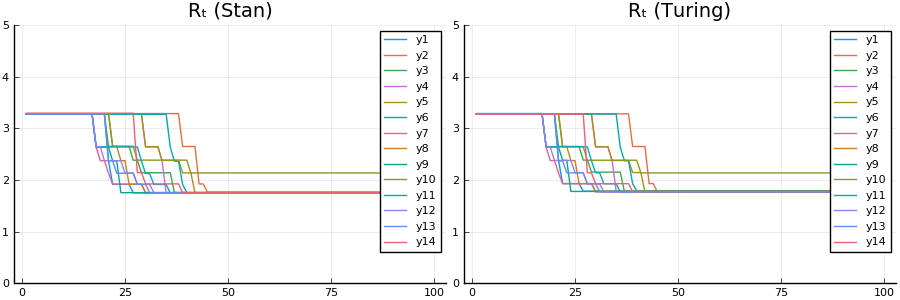

In [101]:
p1 = plot(mean_Rₜ_stan)
title!("Rₜ (Stan)")

p2 = plot(mean_Rₜ_turing)
title!("Rₜ (Turing)")

plot(p1, p2, size = (900, 300))
ylims!(0, 5)

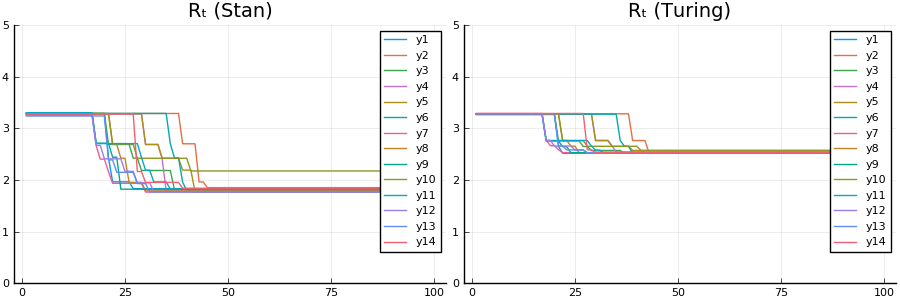

In [101]:
p1 = plot(mean_Rₜ_stan)
title!("Rₜ (Stan)")

p2 = plot(mean_Rₜ_turing)
title!("Rₜ (Turing)")

plot(p1, p2, size = (900, 300))
ylims!(0, 5)

In [109]:
p1 = plot(chain_stan_prior[:y]);

In [110]:
p2 = plot(chain_prior[:y]);

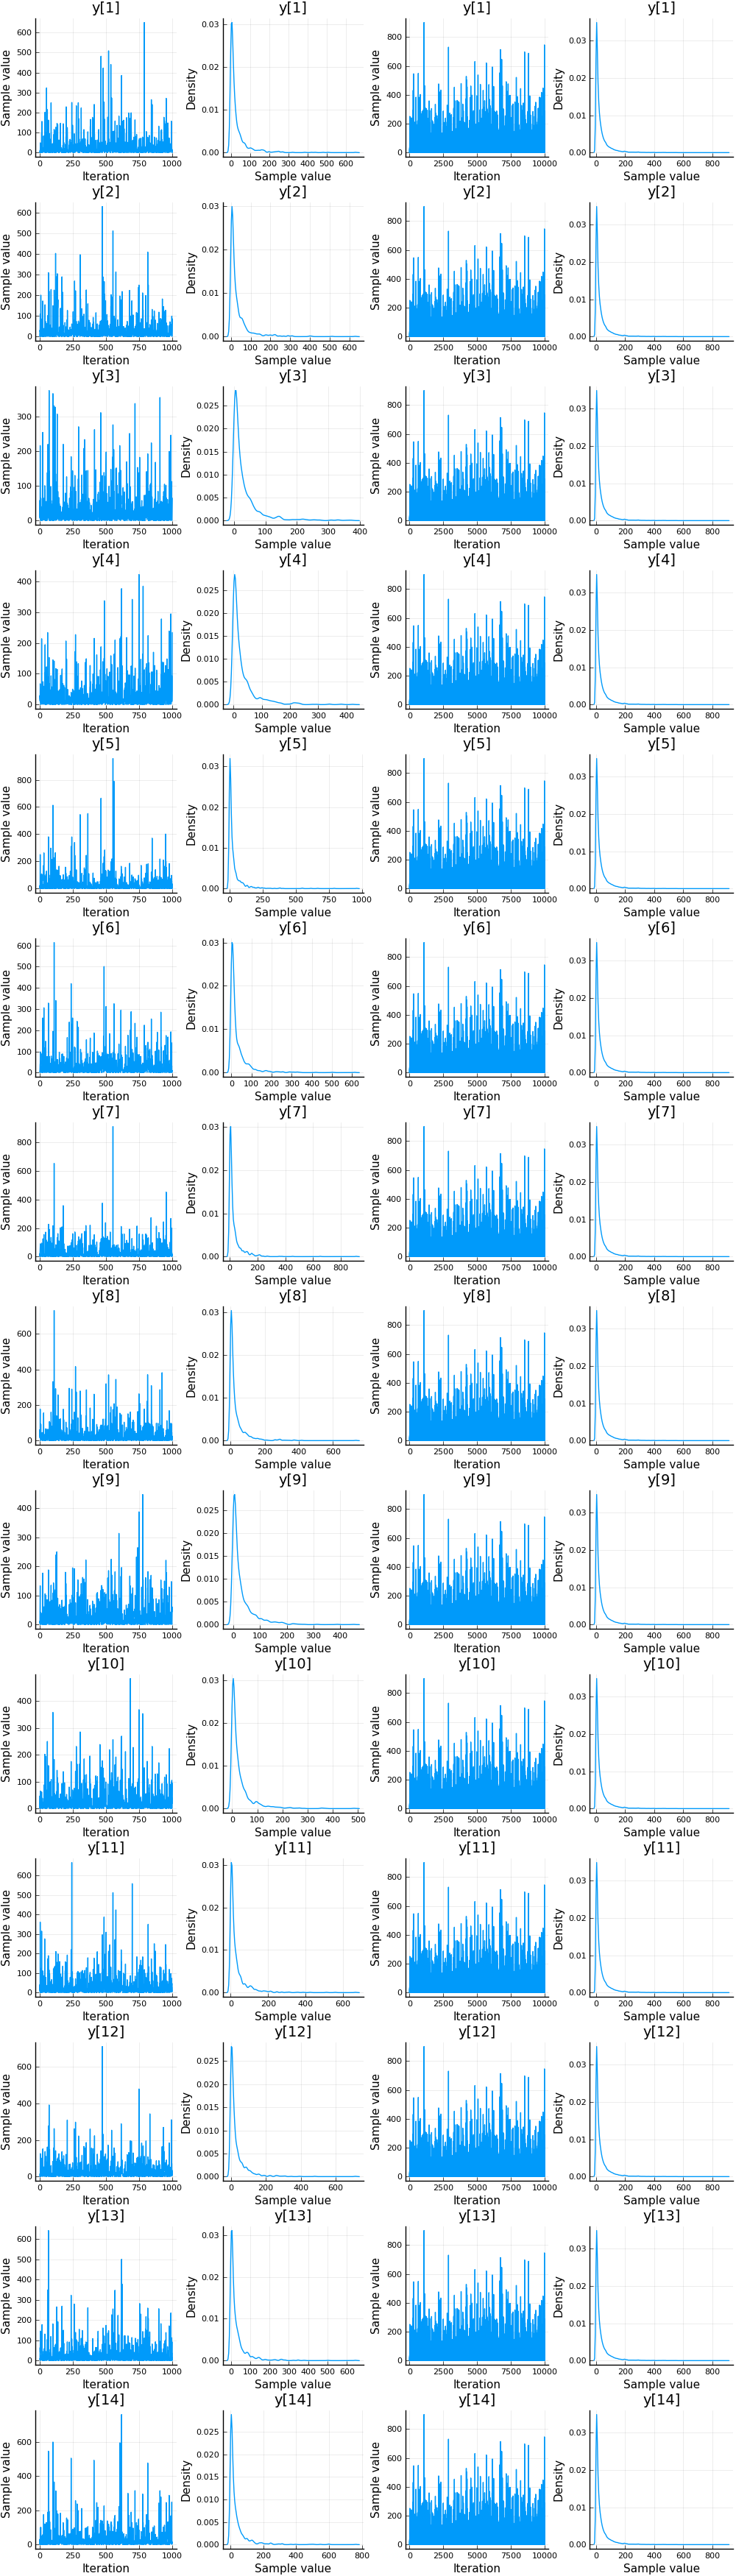

In [111]:
plot(p1, p2, layout = (1, 2))

In [120]:
country_idx = 7

7

In [121]:
hcat([Rₜ_prior[i][country_idx] for i = 1:10_000]...)'

10000×90 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 3.29968  3.29968  3.29968  3.29968  3.29968  …  2.33792   2.33792   2.33792 
 3.61216  3.61216  3.61216  3.61216  3.61216     3.42996   3.42996   3.42996 
 3.33432  3.33432  3.33432  3.33432  3.33432     1.94388   1.94388   1.94388 
 3.45655  3.45655  3.45655  3.45655  3.45655     2.3189    2.3189    2.3189  
 3.27459  3.27459  3.27459  3.27459  3.27459     0.774836  0.774836  0.774836
 3.33379  3.33379  3.33379  3.33379  3.33379  …  1.17719   1.17719   1.17719 
 3.72393  3.72393  3.72393  3.72393  3.72393     3.38807   3.38807   3.38807 
 2.72857  2.72857  2.72857  2.72857  2.72857     0.178619  0.178619  0.178619
 3.04221  3.04221  3.04221  3.04221  3.04221     1.17235   1.17235   1.17235 
 3.79909  3.79909  3.79909  3.79909  3.79909     1.12903   1.12903   1.12903 
 2.88363  2.88363  2.88363  2.88363  2.88363  …  1.28103   1.28103   1.28103 
 3.24855  3.24855  3.24855  3.24855  3.24855     2.93994   2.93994   2.93994 
 3.208

In [122]:
la_prior["Rt"][:, :, country_idx]

10000×90 Array{Float64,2}:
 3.534    3.534    3.534    3.534    …  1.98001    1.98001    1.98001  
 2.73274  2.73274  2.73274  2.73274     1.58481    1.58481    1.58481  
 3.28135  3.28135  3.28135  3.28135     2.90651    2.90651    2.90651  
 3.89443  3.89443  3.89443  3.89443     1.93188    1.93188    1.93188  
 3.28516  3.28516  3.28516  3.28516     2.3406     2.3406     2.3406   
 2.91645  2.91645  2.91645  2.91645  …  1.37546    1.37546    1.37546  
 3.27458  3.27458  3.27458  3.27458     3.22629    3.22629    3.22629  
 3.08715  3.08715  3.08715  3.08715     0.351149   0.351149   0.351149 
 3.87312  3.87312  3.87312  3.87312     3.37153    3.37153    3.37153  
 2.45081  2.45081  2.45081  2.45081     2.53       2.53       2.53     
 3.04146  3.04146  3.04146  3.04146  …  0.714928   0.714928   0.714928 
 4.29187  4.29187  4.29187  4.29187     0.0825957  0.0825957  0.0825957
 3.41862  3.41862  3.41862  3.41862     0.985535   0.985535   0.985535 
 ⋮                                   

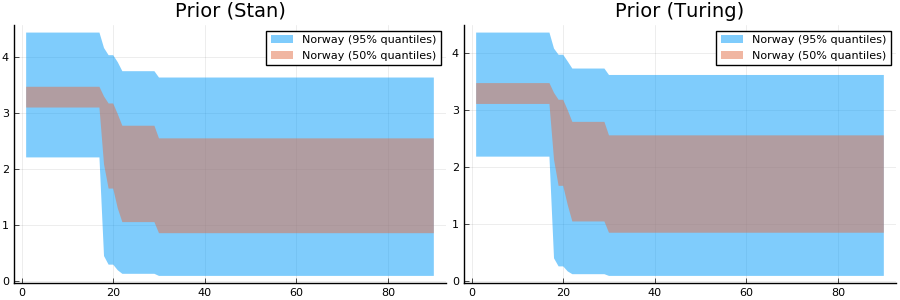

In [123]:
vals = la_prior["Rt"][:, :, country_idx]'
p1 = plot_confidence_timeseries(vals; label = "$(countries[country_idx])")
title!("Prior (Stan)")

vals = hcat([Rₜ_prior[i][country_idx] for i = 1:10_000]...)
p2 = plot_confidence_timeseries(vals; label = "$(countries[country_idx])")
title!("Prior (Turing)")

plot(p1, p2; layout = (1, 2), size = (900, 300))

In [115]:
mean(chain_stan_prior[:alpha_hier]), mean(chain_prior[:α_hier])

(Mean
     parameters    mean
  ─────────────  ──────
  alpha_hier[1]  0.1539
  alpha_hier[2]  0.1773
  alpha_hier[3]  0.1617
  alpha_hier[4]  0.1358
  alpha_hier[5]  0.1510
  alpha_hier[6]  0.1695
, Mean
  parameters    mean
  ──────────  ──────
   α_hier[1]  0.1716
   α_hier[2]  0.1716
   α_hier[3]  0.1716
   α_hier[4]  0.1716
   α_hier[5]  0.1716
   α_hier[6]  0.1716
)

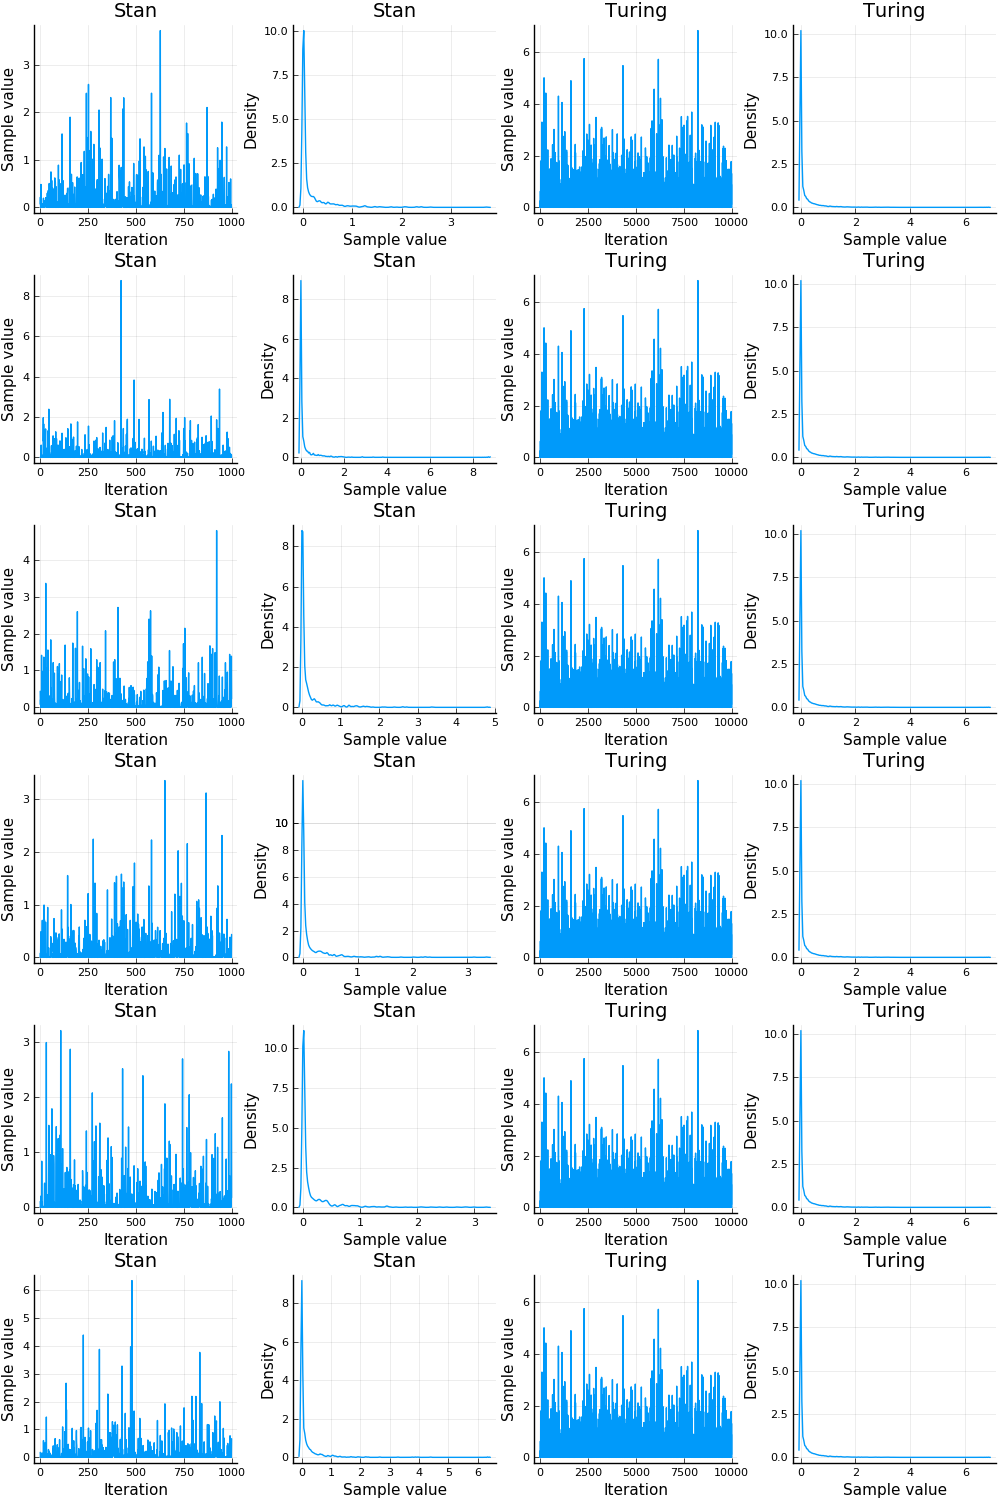

In [113]:
p1 = plot(chain_stan_prior[:alpha_hier])
title!("Stan")
p2 = plot(chain_prior[:α_hier])
title!("Turing")

plot(p1, p2, layout = (1, 2))